In [126]:
import numpy as np
from scipy.linalg import expm
import math
import matplotlib.pyplot as plt

def jmat(j, axis):
    """
    Generate the spin-j operator for the given axis ('x', 'y', or 'z').
    
    Parameters:
        j (float): Spin quantum number.
        axis (str): 'x', 'y', or 'z'.
    
    Returns:
        ndarray: The spin operator matrix.
    """
    m_vals = np.arange(j, -j-1, -1)
    dim = int(2 * j + 1)
    J = np.zeros((dim, dim), dtype=complex)
    
    if axis == 'z':
        np.fill_diagonal(J, m_vals)
    elif axis == 'x':
        for m in range(dim - 1):
            J[m, m + 1] = J[m + 1, m] = 0.5 * np.sqrt((j - m_vals[m]) * (j + m_vals[m + 1]))
    elif axis == 'y':
        for m in range(dim - 1):
            J[m, m + 1] = -0.5j * np.sqrt((j - m_vals[m]) * (j + m_vals[m + 1]))
            J[m + 1, m] = 0.5j * np.sqrt((j - m_vals[m]) * (j + m_vals[m + 1]))
    
    return J

def coherent_spin_state(j, theta, phi):
    """
    Generate a coherent spin state aligned along the direction (theta, phi).
    
    Parameters:
        j (float): Spin quantum number.
        theta (float): Polar angle (angle with z-axis).
        phi (float): Azimuthal angle (angle with x-axis).
    
    Returns:
        ndarray: Coherent spin state vector.
    """
    dim = int(2 * j + 1)
    state = np.zeros((dim, 1), dtype=complex)
    
    for m in range(dim):
        m_val = j - m
        binomial_factor = np.sqrt(math.factorial(2 * j) / (math.factorial(j + m_val) * math.factorial(j - m_val)))
        state[m] = binomial_factor * (np.cos(theta / 2) ** (j + m_val)) * (np.sin(theta / 2) ** (j - m_val))
    
    return state * np.exp(1j * phi * (j - np.arange(0, dim).reshape(-1, 1)))

def apply_squeezing_operator(j, chi, t_s):
    """
    Apply the squeezing operator exp(-i * chi * t_s * Jz^2).
    
    Parameters:
        j (float): Spin quantum number.
        chi (float): Squeezing strength.
        t_s (float): Squeezing time.
    
    Returns:
        ndarray: Squeezing operator matrix.
    """
    Jz = jmat(j, 'z')
    return expm(-1j * chi * t_s * np.dot(Jz, Jz))

def variance(operator, state):
    """
    Compute the variance of an operator in the given state.
    
    Parameters:
        operator (ndarray): The spin operator matrix.
        state (ndarray): The state vector.
    
    Returns:
        float: The variance of the operator.
    """
    expectation_value = np.vdot(state, np.dot(operator, state))
    expectation_value_squared = np.abs(expectation_value) ** 2
    operator_squared = np.dot(operator, operator)
    expectation_value_operator_squared = np.vdot(state, np.dot(operator_squared, state))
    return np.abs(expectation_value_operator_squared - expectation_value_squared)

def test_squeezed_state(j, chi, t_s):
    """
    Test the coherent state and its squeezing by checking the variances
    before and after squeezing.
    
    Parameters:
        j (float): Spin quantum number.
        chi (float): Squeezing strength.
        t_s (float): Squeezing time.
    
    Returns:
        None: Prints the test results for the coherent and squeezed states.
    """
    # Generate coherent state aligned along the x-axis (theta = pi/2, phi = 0)
    coherent_state = coherent_spin_state(j, np.pi / 2, 0)
    
    # Define spin operators
    Jy = jmat(j, 'y')
    Jz = jmat(j, 'z')

    # Variances before squeezing
    var_Jy_before = variance(Jy, coherent_state)
    var_Jz_before = variance(Jz, coherent_state)
    
    print("Before Squeezing:")
    print(f"  Var(Jy): {var_Jy_before}")
    print(f"  Var(Jz): {var_Jz_before}")

    # Apply squeezing operator
    squeezing_operator = apply_squeezing_operator(j, chi, t_s)
    squeezed_state = np.dot(squeezing_operator, coherent_state)

    # Variances after squeezing
    var_Jy_after = variance(Jy, squeezed_state)
    var_Jz_after = variance(Jz, squeezed_state)
    
    print("\nAfter Squeezing:")
    print(f"  Var(Jy): {var_Jy_after}")
    print(f"  Var(Jz): {var_Jz_after}")

    # Check expectation values for further diagnostics
    exp_Jy_before = np.vdot(coherent_state, np.dot(Jy, coherent_state))
    exp_Jz_before = np.vdot(coherent_state, np.dot(Jz, coherent_state))

    exp_Jy_after = np.vdot(squeezed_state, np.dot(Jy, squeezed_state))
    exp_Jz_after = np.vdot(squeezed_state, np.dot(Jz, squeezed_state))

    print("\nExpectation values before squeezing:")
    print(f"  <Jy>: {exp_Jy_before}")
    print(f"  <Jz>: {exp_Jz_before}")

    print("\nExpectation values after squeezing:")
    print(f"  <Jy>: {exp_Jy_after}")
    print(f"  <Jz>: {exp_Jz_after}")

# Example usage:
j = 10  # Total spin quantum number (e.g., N = 20 particles)
chi = 0.1  # Squeezing strength
t_s = 1.0  # Squeezing time

# Test the coherent state and its squeezing
test_squeezed_state(j, chi, t_s)


Before Squeezing:
  Var(Jy): 4.048466593961365
  Var(Jz): 4.999999999999998

After Squeezing:
  Var(Jy): 15.514125811295088
  Var(Jz): 4.999999999999997

Expectation values before squeezing:
  <Jy>: 1.5672791710971e-17j
  <Jz>: (1.6019917190761637e-15+0j)

Expectation values after squeezing:
  <Jy>: (2.406113203041921e-15+5.046155746041134e-17j)
  <Jz>: (1.512862940023827e-15+2.7332958896543882e-17j)


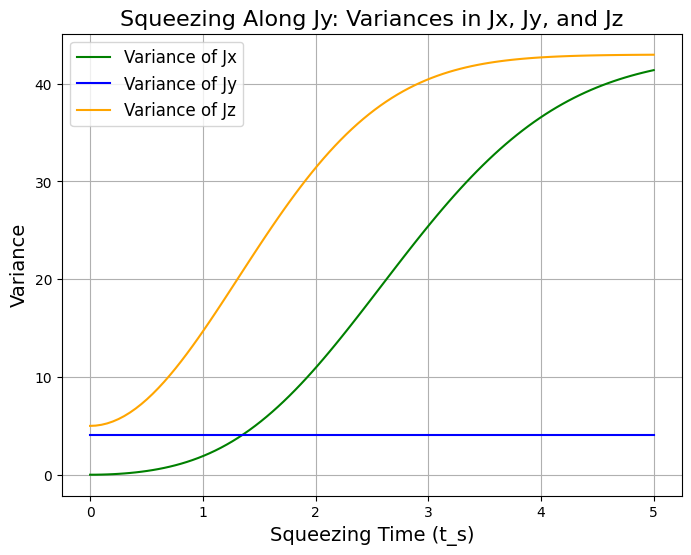

In [128]:
import numpy as np
from scipy.linalg import expm
import math
import matplotlib.pyplot as plt

def jmat(j, axis):
    """
    Generate the spin-j operator for the given axis ('x', 'y', or 'z').
    
    Parameters:
        j (float): Spin quantum number.
        axis (str): 'x', 'y', or 'z'.
    
    Returns:
        ndarray: The spin operator matrix.
    """
    m_vals = np.arange(j, -j-1, -1)
    dim = int(2 * j + 1)
    J = np.zeros((dim, dim), dtype=complex)
    
    if axis == 'z':
        np.fill_diagonal(J, m_vals)
    elif axis == 'x':
        for m in range(dim - 1):
            J[m, m + 1] = J[m + 1, m] = 0.5 * np.sqrt((j - m_vals[m]) * (j + m_vals[m + 1]))
    elif axis == 'y':
        for m in range(dim - 1):
            J[m, m + 1] = -0.5j * np.sqrt((j - m_vals[m]) * (j + m_vals[m + 1]))
            J[m + 1, m] = 0.5j * np.sqrt((j - m_vals[m]) * (j + m_vals[m + 1]))
    
    return J

def coherent_spin_state(j, theta, phi):
    """
    Generate a coherent spin state aligned along the direction (theta, phi).
    
    Parameters:
        j (float): Spin quantum number.
        theta (float): Polar angle (angle with z-axis).
        phi (float): Azimuthal angle (angle with x-axis).
    
    Returns:
        ndarray: Coherent spin state vector.
    """
    dim = int(2 * j + 1)
    state = np.zeros((dim, 1), dtype=complex)
    
    for m in range(dim):
        m_val = j - m
        binomial_factor = np.sqrt(math.factorial(2 * j) / (math.factorial(j + m_val) * math.factorial(j - m_val)))
        state[m] = binomial_factor * (np.cos(theta / 2) ** (j + m_val)) * (np.sin(theta / 2) ** (j - m_val))
    
    return state * np.exp(1j * phi * (j - np.arange(0, dim).reshape(-1, 1)))

def apply_squeezing_operator(j, chi, t_s):
    """
    Apply the squeezing operator exp(-i * chi * t_s * Jy^2).
    
    Parameters:
        j (float): Spin quantum number.
        chi (float): Squeezing strength.
        t_s (float): Squeezing time.
    
    Returns:
        ndarray: Squeezing operator matrix for squeezing along Jz.
    """
    Jy = jmat(j, 'y')
    return expm(-1j * chi * t_s * np.dot(Jy, Jy))  # Squeezing along Jy

def variance(operator, state):
    """
    Compute the variance of an operator in the given state.
    
    Parameters:
        operator (ndarray): The spin operator matrix.
        state (ndarray): The state vector.
    
    Returns:
        float: The variance of the operator.
    """
    expectation_value = np.vdot(state, np.dot(operator, state))
    expectation_value_squared = np.abs(expectation_value) ** 2
    operator_squared = np.dot(operator, operator)
    expectation_value_operator_squared = np.vdot(state, np.dot(operator_squared, state))
    return np.abs(expectation_value_operator_squared - expectation_value_squared)

def plot_variances_during_squeezing(j, chi, t_values):
    """
    Plot the variances of Jx, Jy, and Jz over time during the squeezing process.
    
    Parameters:
        j (float): Total spin quantum number (N/2).
        chi (float): Squeezing strength.
        t_values (array): Array of squeezing times to simulate.
    
    Returns:
        None: Plots the variance changes in Jx, Jy, and Jz over time.
    """
    Jx = jmat(j, 'x')
    Jy = jmat(j, 'y')
    Jz = jmat(j, 'z')

    # Generate coherent spin state along z-axis (aligned with z-axis for squeezing)
    coherent_state = coherent_spin_state(j, np.pi / 2, 0)

    # Lists to store variance values over time
    var_Jx_values = []
    var_Jy_values = []
    var_Jz_values = []

    # Loop through squeezing times
    for t_s in t_values:
        # Apply squeezing along Jz
        squeezing_operator = apply_squeezing_operator(j, chi, t_s)
        squeezed_state = np.dot(squeezing_operator, coherent_state)

        # Measure variances
        var_Jx = variance(Jx, squeezed_state)
        var_Jy = variance(Jy, squeezed_state)
        var_Jz = variance(Jz, squeezed_state)

        var_Jx_values.append(var_Jx)
        var_Jy_values.append(var_Jy)
        var_Jz_values.append(var_Jz)

    # Plot the variances
    plt.figure(figsize=(8, 6))
    plt.plot(t_values, var_Jx_values, label='Variance of Jx', color='green')
    plt.plot(t_values, var_Jy_values, label='Variance of Jy', color='blue')
    plt.plot(t_values, var_Jz_values, label='Variance of Jz', color='orange')
    plt.xlabel("Squeezing Time (t_s)", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.title("Squeezing Along Jy: Variances in Jx, Jy, and Jz", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Example usage:
j = 10  # Total spin quantum number (e.g., N = 20 particles)
chi = 0.1  # Squeezing strength
t_values = np.linspace(0, 5.0, 100)  # Time values for squeezing evolution

# Plot variance changes during squeezing
plot_variances_during_squeezing(j, chi, t_values)


In [78]:
import numpy as np
import qutip as qt

# Define the squeezing Hamiltonian using chi and Jz
def apply_squeezing_via_oat(j, chi, t_s):
    Jz = qt.jmat(j, 'z')  # Collective spin operator along the z-axis
    H_squeeze = chi * Jz ** 2  # One-axis twisting Hamiltonian
    return (-1j * H_squeeze * t_s).expm()  # Time-evolution operator

def test_squeezed_state(j, chi, t_s):
    """
    Test the coherent state and its squeezing by checking the expectation values 
    and variances before and after squeezing.
    
    Parameters:
        j (float): Total spin quantum number (N/2).
        chi (float): Squeezing strength.
        t_s (float): Squeezing time.
    
    Returns:
        None: Prints the test results for the coherent and squeezed states.
    """
    # Generate coherent state aligned along the x-axis
    coherent_state = qt.spin_coherent(j, np.pi / 2, np.pi/2)

    # Define collective spin operators
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')

    # Variances before squeezing
    var_Jx_before = qt.variance(Jx, coherent_state)
    var_Jy_before = qt.variance(Jy, coherent_state)
    var_Jz_before = qt.variance(Jz, coherent_state)
    
    print("Before Squeezing:")
    print(f"  Var(Jx): {var_Jx_before}")
    print(f"  Var(Jy): {var_Jy_before}")
    print(f"  Var(Jz): {var_Jz_before}")

    # Apply squeezing via the OAT Hamiltonian
    squeezing_operator = apply_squeezing_via_oat(j, chi, t_s)
    squeezed_state = squeezing_operator * coherent_state

    # Variances after squeezing
    var_Jx_after = qt.variance(Jx, squeezed_state)
    var_Jy_after = qt.variance(Jy, squeezed_state)
    var_Jz_after = qt.variance(Jz, squeezed_state)
    
    print("\nAfter Squeezing:")
    print(f"  Var(Jx): {var_Jx_after}")
    print(f"  Var(Jy): {var_Jy_after}")
    print(f"  Var(Jz): {var_Jz_after}")

# Example usage:
j = 10  # Total spin quantum number (e.g., N = 20 particles)
chi = 0.1  # Squeezing strength
t_s = 1.0  # Squeezing time

# Test the coherent state and its squeezing
test_squeezed_state(j, chi, t_s)


Before Squeezing:
  Var(Jx): 5.000000000000004
  Var(Jy): -7.105427357601002e-14
  Var(Jz): 5.000000000000004

After Squeezing:
  Var(Jx): 19.440670988724328
  Var(Jy): 2.889668532914925
  Var(Jz): 5.000000000000004


In [118]:
import numpy as np
import qutip as qt

def test_coherent_state(j):
    """
    Test if the coherent spin state generated is correct by checking
    the expectation values and variances of spin operators.
    
    Parameters:
        j (float): Total spin quantum number (N/2).
    
    Returns:
        None: Prints the test results for the coherent state.
    """
    # Generate coherent state aligned along the x-axis
    coherent_state = qt.spin_coherent(j, np.pi / 2, 0)
    
    # Define collective spin operators
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')

    # Expectation values
    exp_Jx = qt.expect(Jx, coherent_state)
    exp_Jy = qt.expect(Jy, coherent_state)
    exp_Jz = qt.expect(Jz, coherent_state)

    print(f"Expectation values:")
    print(f"  <Jx>: {exp_Jx}")
    print(f"  <Jy>: {exp_Jy}")
    print(f"  <Jz>: {exp_Jz}")

    # Variances
    var_Jx = qt.variance(Jx, coherent_state)
    var_Jy = qt.variance(Jy, coherent_state)
    var_Jz = qt.variance(Jz, coherent_state)

    print("\nVariances:")
    print(f"  Var(Jx): {var_Jx}")
    print(f"  Var(Jy): {var_Jy}")
    print(f"  Var(Jz): {var_Jz}")

    # Check for minimum uncertainty
    uncertainty_relation = var_Jx * var_Jy
    print(f"\nUncertainty relation (Var(Jx) * Var(Jy)): {uncertainty_relation}")
    print(f"Minimum expected uncertainty (j/2): {j / 2}")

# Example usage:
j = 10  # Total spin quantum number (e.g., N = 20 particles)

# Test the coherent spin state
test_coherent_state(j)


Expectation values:
  <Jx>: 10.000000000000004
  <Jy>: 0.0
  <Jz>: 6.641585339420969e-16

Variances:
  Var(Jx): -4.263256414560601e-14
  Var(Jy): 5.000000000000005
  Var(Jz): 5.0

Uncertainty relation (Var(Jx) * Var(Jy)): -2.1316282072803028e-13
Minimum expected uncertainty (j/2): 5.0


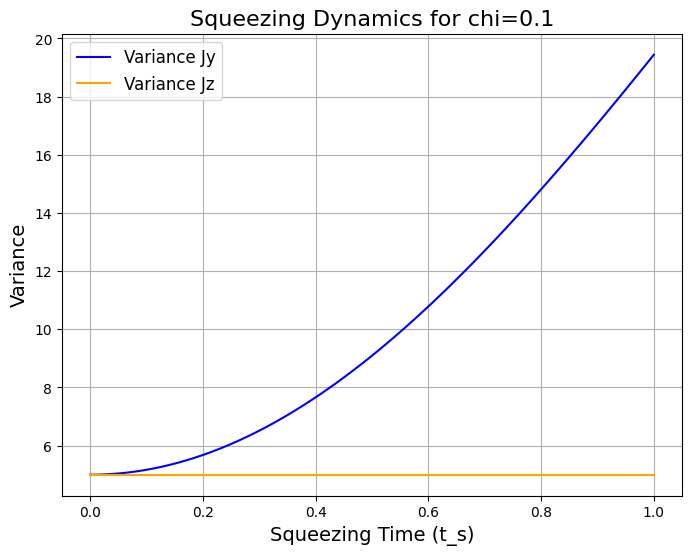

Final Jy Variance: 19.44067098872432
Final Jz Variance: 5.000000000000001


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Define the squeezing Hamiltonian using chi and Jz
def apply_squeezing_via_oat(j, chi, t_s):
    Jz = qt.jmat(j, 'z')  # Collective spin operator along the z-axis
    H_squeeze = chi * Jz ** 2  # One-axis twisting Hamiltonian
    return (-1j * H_squeeze * t_s).expm()  # Time-evolution operator

def time_evolve_state(H, state, t):
    return (-1j * H * t).expm() * state

def measure_phase_variance(operator, state):
    return qt.variance(operator, state)

def verify_squeezing_dynamics(j, chi, t_values):
    """
    Simulate squeezing dynamics and measure Jy and Jz variances over time.
    
    Parameters:
        j (float): Total spin quantum number.
        chi (float): Squeezing strength.
        t_values (array): Array of squeezing times to simulate.
    
    Returns:
        tuple: Arrays of variances (Jy and Jz) over time.
    """
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')

    # Initial coherent state aligned along the x-axis (typical for spin squeezing)
    coherent_state = qt.spin_coherent(j, np.pi / 2, 0)  # Coherent state in the x-direction

    # Arrays to store variances
    var_Jy_values = []
    var_Jz_values = []

    # Simulate squeezing over different times
    for t_s in t_values:
        # Apply squeezing
        squeezing_operator = apply_squeezing_via_oat(j, chi, t_s)
        squeezed_state = squeezing_operator * coherent_state

        # Measure variances in Jy and Jz
        var_Jy = qt.variance(Jy, squeezed_state)
        var_Jz = qt.variance(Jz, squeezed_state)

        var_Jy_values.append(var_Jy)
        var_Jz_values.append(var_Jz)

    return var_Jy_values, var_Jz_values

# Plot the variance dynamics during squeezing
def plot_squeezing_dynamics(j, chi, max_time_steps):
    """
    Plot variance changes in Jy and Jz during the squeezing process.
    
    Parameters:
        j (float): Total spin quantum number.
        chi (float): Squeezing strength.
        max_time_steps (int): Number of steps to simulate squeezing dynamics.
    """
    # Time values for squeezing evolution
    t_values = np.linspace(0, 1.0, max_time_steps)

    # Get variance values over time
    var_Jy_values, var_Jz_values = verify_squeezing_dynamics(j, chi, t_values)

    # Plot the variance changes
    plt.figure(figsize=(8, 6))
    plt.plot(t_values, var_Jy_values, label="Variance Jy", color='blue')
    plt.plot(t_values, var_Jz_values, label="Variance Jz", color='orange')
    plt.title(f"Squeezing Dynamics for chi={chi}", fontsize=16)
    plt.xlabel("Squeezing Time (t_s)", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Print final variances after squeezing
    print(f"Final Jy Variance: {var_Jy_values[-1]}")
    print(f"Final Jz Variance: {var_Jz_values[-1]}")

# Example usage
j = 10  # Total spin quantum number (e.g., N = 20 particles)
chi = 0.1  # Squeezing strength
max_time_steps = 100  # Number of steps for squeezing simulation

# Plot variance changes during squeezing
plot_squeezing_dynamics(j, chi, max_time_steps)


/var/folders/3j/grhshysx2qb2lnsvc18r_g0c0000gn/T/ipykernel_71299/2375557746.py:222: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


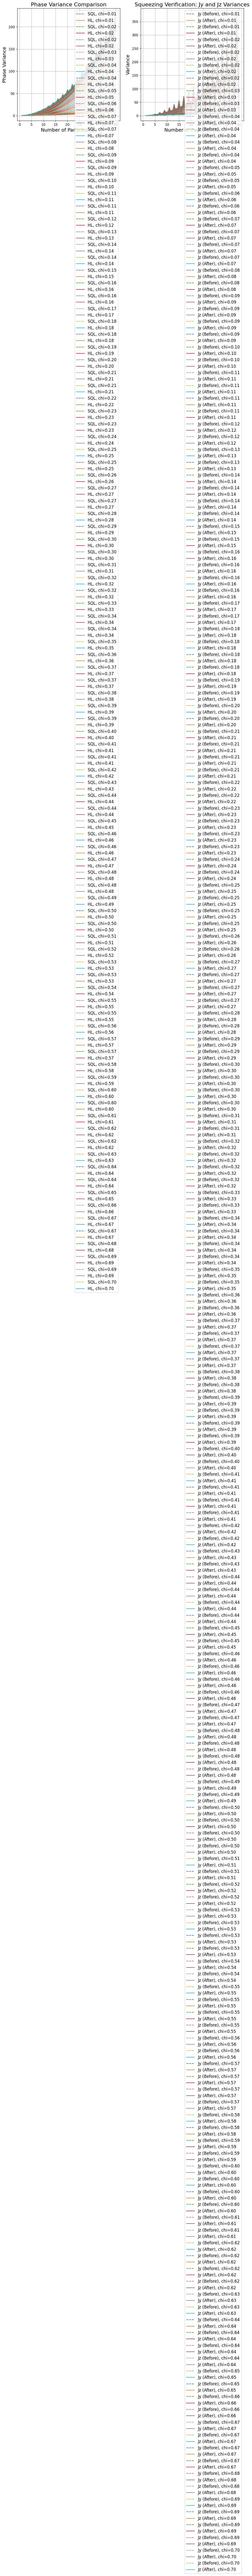

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Total time available for the experiment (fixed)
T_total = 1.0

# Fractions of time for preparation and measurement
tau_prep_fraction = 0.1  # Preparation time fraction (10% of T_total)
tau_meas_fraction = 0.05  # Measurement time fraction (5% of T_total)

def generate_coherent_state(j):
    """
    Generate a coherent spin state aligned along the x-axis.
    Parameters:
        j (float): Total spin quantum number (N/2).
    Returns:
        Qobj: Coherent spin state.
    """
    theta = np.pi / 2  # Aligned along the x-axis
    phi = 0  # No rotation around the z-axis
    return qt.spin_coherent(j, theta, phi)

def apply_squeezing_via_oat(j, chi, t_s):
    """
    Apply squeezing using the one-axis twisting (OAT) Hamiltonian H_squeeze = chi * Jz^2.
    Parameters:
        j (float): Total spin quantum number.
        chi (float): Squeezing strength.
        t_s (float): Squeezing time (related to squeezing strength and interaction time).
    Returns:
        Qobj: Time-evolution operator for squeezing.
    """
    Jz = qt.jmat(j, 'z')  # Collective spin operator along the z-axis
    H_squeeze = chi * Jz ** 2  # One-axis twisting Hamiltonian
    U_squeeze = (-1j * H_squeeze * t_s).expm()  # Time-evolution operator for squeezing
    return U_squeeze

def time_evolve_state(H, state, t):
    """
    Perform time evolution of a quantum state under a Hamiltonian H for time t.
    Parameters:
        H (Qobj): Hamiltonian of the system.
        state (Qobj): Initial quantum state.
        t (float): Time of evolution.
    
    Returns:
        Qobj: Evolved quantum state after time t.
    """
    U = (-1j * H * t).expm()  # Time evolution operator U = exp(-i H t)
    return U * state

def measure_phase_variance(operator, state):
    """
    Measure the phase variance of a given quantum state.
    
    Parameters:
        operator (Qobj): Spin operator (typically Jz or Jy).
        state (Qobj): Quantum state (coherent or squeezed).
    
    Returns:
        float: Phase variance of the state.
    """
    return qt.variance(operator, state)

def calculate_fisher_information(N, sensing_time, is_entangled):
    """
    Calculate Fisher Information based on the sensing time and particle number.
    
    Parameters:
        N (int): Number of particles.
        sensing_time (float): Time spent in sensing.
        is_entangled (bool): Whether the state is entangled (HL) or separable (SQL).
    
    Returns:
        float: Fisher Information.
    """
    if is_entangled:
        return N**2 * sensing_time**2  # Heisenberg scaling (entangled states)
    else:
        return N * sensing_time**2  # Standard Quantum Limit scaling (separable states)

def verify_squeezing(j, chi, t_s):
    """
    Verify if squeezing has been applied correctly by comparing the variances in Jy and Jz.
    
    Parameters:
        j (float): Total spin quantum number.
        chi (float): Squeezing strength.
        t_s (float): Squeezing time.
    
    Returns:
        tuple: Variances of Jy and Jz before and after squeezing.
    """
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')

    coherent_state = generate_coherent_state(j)

    # Measure variances before squeezing
    var_Jy_before = qt.variance(Jy, coherent_state)
    var_Jz_before = qt.variance(Jz, coherent_state)

    # Apply squeezing
    squeezing_operator = apply_squeezing_via_oat(j, chi, t_s)
    squeezed_state = squeezing_operator * coherent_state

    # Measure variances after squeezing
    var_Jy_after = qt.variance(Jy, squeezed_state)
    var_Jz_after = qt.variance(Jz, squeezed_state)

    return var_Jy_before, var_Jz_before, var_Jy_after, var_Jz_after

def calculate_phase_variances_and_verify_squeezing(N_max, omega, chi_values, t_s, tau_prep_fraction, tau_meas_fraction, T_total):
    """
    Calculate phase variances and the metrological gain r for a range of squeezing strengths.
    
    Parameters:
        N_max (int): Maximum number of particles.
        omega (float): Frequency shift due to the local oscillator.
        chi_values (list): List of squeezing strengths to test.
        t_s (float): Squeezing time.
        tau_prep_fraction (float): Fraction of total time for preparation.
        tau_meas_fraction (float): Fraction of total time for measurement.
        T_total (float): Total fixed time.
    
    Returns:
        dict: Phase variances for SQL and HL for each chi, and verification results.
    """
    results = {'chi': [], 'SQL_variance': [], 'HL_variance': [], 'verification': []}

    for chi in chi_values:
        phase_variance_sql = []
        phase_variance_hl = []
        verification_data = []

        for N in range(1, N_max + 1):
            j = N / 2  # Total spin quantum number
        
            # Define collective spin operators
            Jy = qt.jmat(j, 'y')
            Jz = qt.jmat(j, 'z')

            # Allocate time based on the total T_total
            tau_prep = tau_prep_fraction * T_total
            tau_meas = tau_meas_fraction * T_total
            tau_sense = T_total - tau_prep - tau_meas

            # Separable (SQL) Strategy
            coherent_state = generate_coherent_state(j)
            H_sense = omega * Jz  # Sensing Hamiltonian
            evolved_coherent_state = time_evolve_state(H_sense, coherent_state, tau_sense)
            
            # Measure SQL variance
            phase_var_sql = measure_phase_variance(Jz, evolved_coherent_state)
            phase_variance_sql.append(phase_var_sql)

            # Entangled (HL) Strategy
            squeezing_operator = apply_squeezing_via_oat(j, chi, t_s)
            squeezed_state = squeezing_operator * coherent_state
            evolved_squeezed_state = time_evolve_state(H_sense, squeezed_state, tau_sense)
            
            # Measure HL variance
            phase_var_hl = measure_phase_variance(Jy, evolved_squeezed_state)
            phase_variance_hl.append(phase_var_hl)

            # Verify squeezing: Measure variances in Jy and Jz before and after squeezing
            var_Jy_before, var_Jz_before, var_Jy_after, var_Jz_after = verify_squeezing(j, chi, t_s)
            verification_data.append((var_Jy_before, var_Jz_before, var_Jy_after, var_Jz_after))

        # Store results for each chi
        results['chi'].append(chi)
        results['SQL_variance'].append(phase_variance_sql)
        results['HL_variance'].append(phase_variance_hl)
        results['verification'].append(verification_data)

    return results

# Plot results and verification
def plot_phase_variance_and_verification(N_max, results):
    """
    Plot the phase variance comparison and verification results for a range of squeezing strengths.
    
    Parameters:
        N_max (int): Maximum number of particles.
        results (dict): Results from the phase variance and verification calculations.
    """
    plt.figure(figsize=(12, 6))

    # Plot phase variances for SQL and HL
    for i, chi in enumerate(results['chi']):
        plt.subplot(1, 2, 1)
        plt.plot(range(1, N_max+1), results['SQL_variance'][i], label=f"SQL, chi={chi:.2f}", linestyle='--')
        plt.plot(range(1, N_max+1), results['HL_variance'][i], label=f"HL, chi={chi:.2f}", linestyle='-')
    
    plt.title("Phase Variance Comparison", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("Phase Variance", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot verification of squeezing (Jy and Jz variances)
    for i, chi in enumerate(results['chi']):
        verification = results['verification'][i]
        var_Jy_before = [v[0] for v in verification]
        var_Jz_before = [v[1] for v in verification]
        var_Jy_after = [v[2] for v in verification]
        var_Jz_after = [v[3] for v in verification]

        plt.subplot(1, 2, 2)
        plt.plot(range(1, N_max+1), var_Jy_before, label=f"Jy (Before), chi={chi:.2f}", linestyle='--')
        plt.plot(range(1, N_max+1), var_Jy_after, label=f"Jy (After), chi={chi:.2f}", linestyle='-')
        plt.plot(range(1, N_max+1), var_Jz_before, label=f"Jz (Before), chi={chi:.2f}", linestyle='--')
        plt.plot(range(1, N_max+1), var_Jz_after, label=f"Jz (After), chi={chi:.2f}", linestyle='-')

    plt.title("Squeezing Verification: Jy and Jz Variances", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("Variance", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
N_max = 40
omega = 1.0
t_s = 2.31  # Squeezing time
chi_values = np.linspace(0.01, 0.7, 100)  # Range of squeezing strengths to test

# Calculate phase variances and verify squeezing for different chi values
results = calculate_phase_variances_and_verify_squeezing(N_max, omega, chi_values, t_s, tau_prep_fraction, tau_meas_fraction, T_total)

# Plot the results
plot_phase_variance_and_verification(N_max, results)


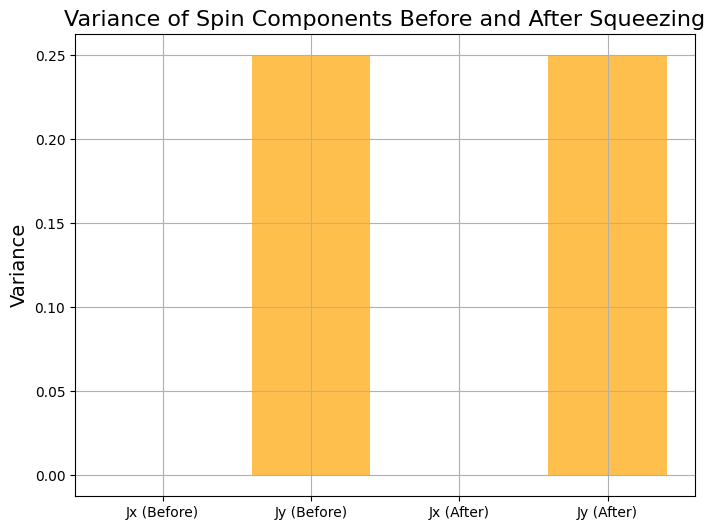

Variance in Jx before squeezing: 0.0
Variance in Jy before squeezing: 0.25
Variance in Jx after squeezing: -5.551115123125783e-17
Variance in Jy after squeezing: 0.25000000000000006
1 0.24999999999999997 0.10889443821305947


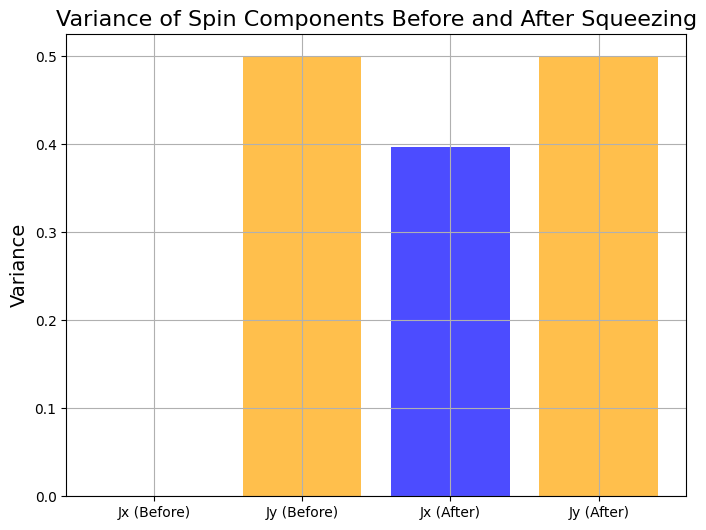

Variance in Jx before squeezing: 0.0
Variance in Jy before squeezing: 0.5000000000000001
Variance in Jx after squeezing: 0.39697773559074623
Variance in Jy after squeezing: 0.5
2 0.5 0.44185194201587785


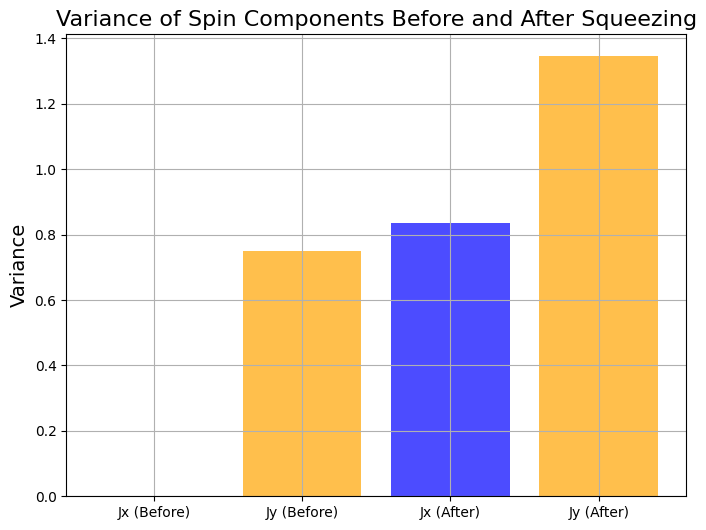

Variance in Jx before squeezing: 0.0
Variance in Jy before squeezing: 0.7499999999999998
Variance in Jx after squeezing: 0.8363527310240364
Variance in Jy after squeezing: 1.3454666033861196
3 0.7500000000000002 1.0581114074934133


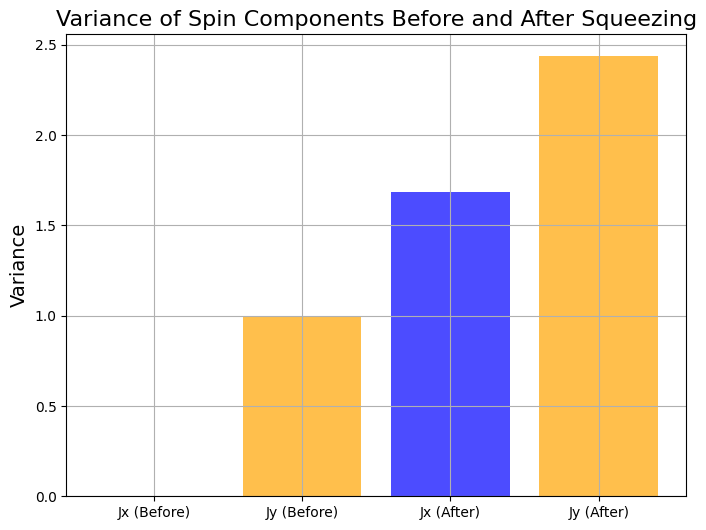

Variance in Jx before squeezing: 8.881784197001252e-16
Variance in Jy before squeezing: 1.0000000000000002
Variance in Jx after squeezing: 1.6865594637220913
Variance in Jy after squeezing: 2.436318478215938
4 0.9999999999999997 2.0131378104360294


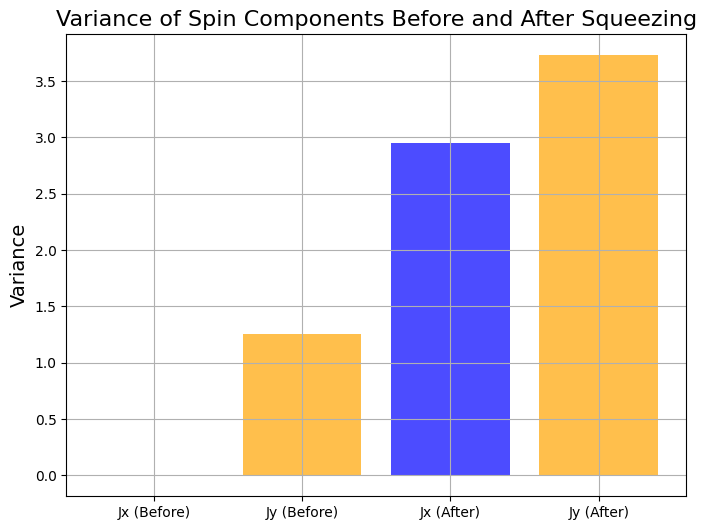

Variance in Jx before squeezing: -1.7763568394002505e-15
Variance in Jy before squeezing: 1.2500000000000004
Variance in Jx after squeezing: 2.945424762725996
Variance in Jy after squeezing: 3.7281312847492623
5 1.2499999999999998 3.286354310731683


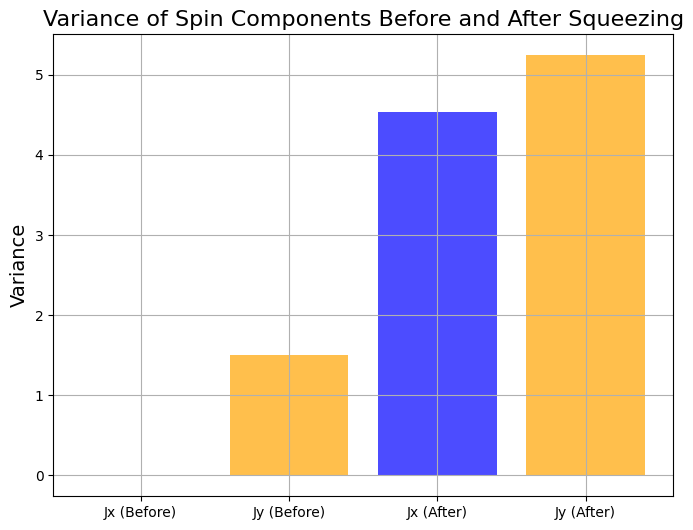

Variance in Jx before squeezing: -1.7763568394002505e-15
Variance in Jy before squeezing: 1.4999999999999998
Variance in Jx after squeezing: 4.539114584425879
Variance in Jy after squeezing: 5.243241106305444
6 1.5000000000000002 4.8458164325498405


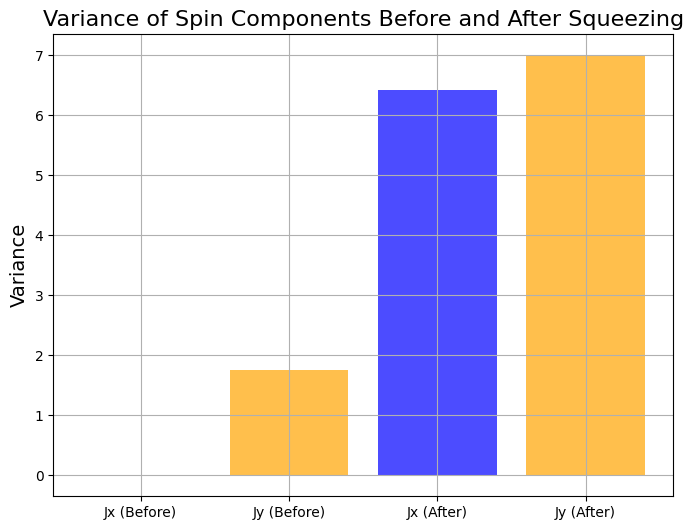

Variance in Jx before squeezing: -5.329070518200751e-15
Variance in Jy before squeezing: 1.7500000000000009
Variance in Jx after squeezing: 6.412921371727586
Variance in Jy after squeezing: 6.99805031370672
7 1.7500000000000002 6.6677905214036635


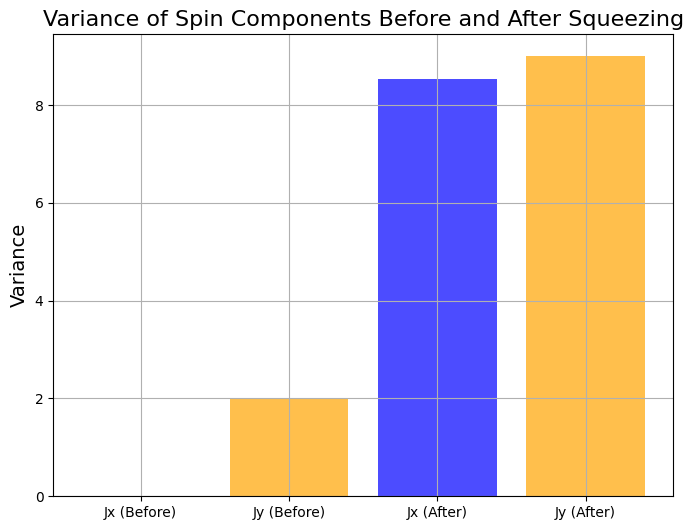

Variance in Jx before squeezing: 5.329070518200751e-15
Variance in Jy before squeezing: 1.9999999999999991
Variance in Jx after squeezing: 8.536604608464245
Variance in Jy after squeezing: 8.999464370408472
8 1.9999999999999991 8.738216023457632


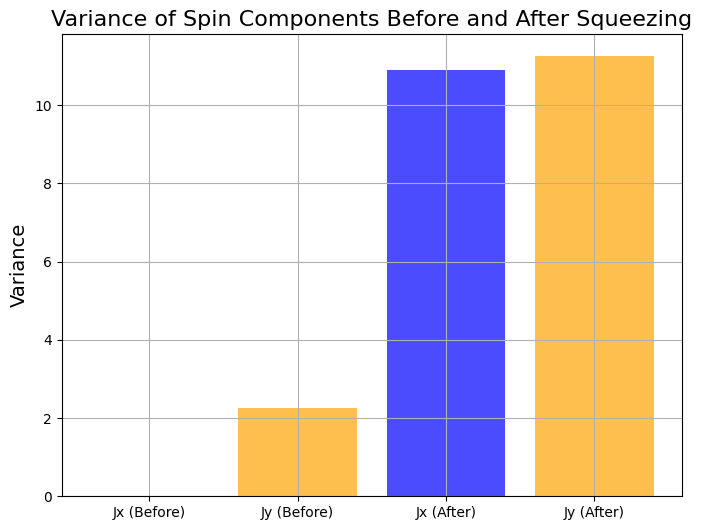

Variance in Jx before squeezing: 0.0
Variance in Jy before squeezing: 2.250000000000002
Variance in Jx after squeezing: 10.896069715893766
Variance in Jy after squeezing: 11.249858104011254
9 2.25 11.050172066975199


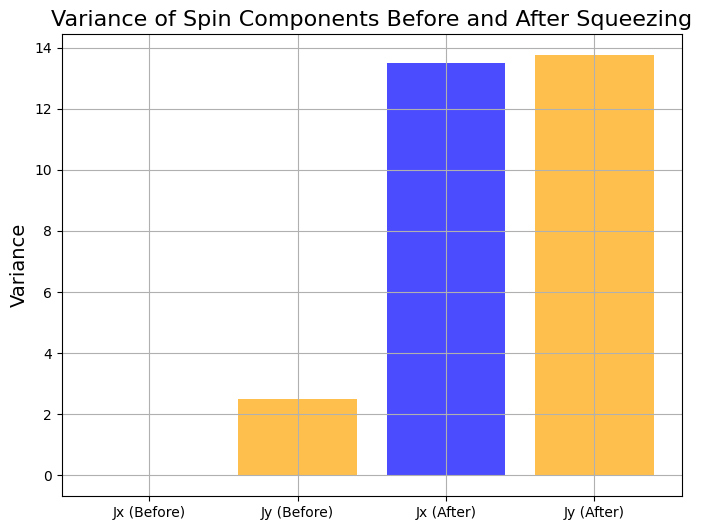

Variance in Jx before squeezing: -1.4210854715202004e-14
Variance in Jy before squeezing: 2.499999999999999
Variance in Jx after squeezing: 13.486439746355671
Variance in Jy after squeezing: 13.74996345388482
10 2.500000000000001 13.60122481070451


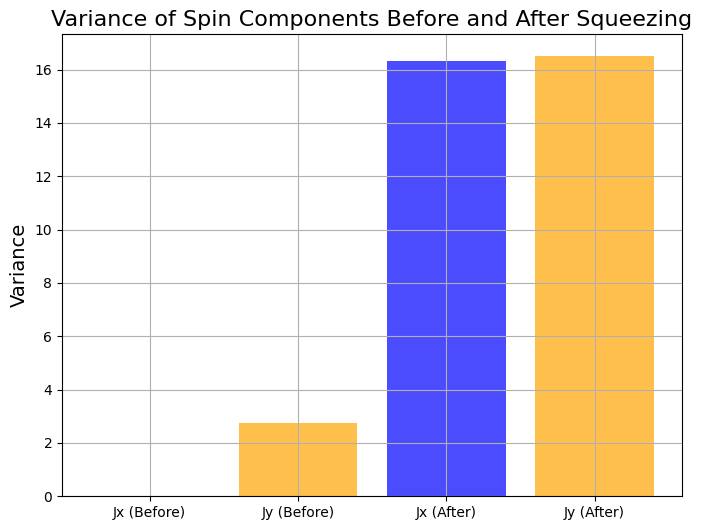

Variance in Jx before squeezing: 1.0658141036401503e-14
Variance in Jy before squeezing: 2.7500000000000004
Variance in Jx after squeezing: 16.307673969199413
Variance in Jy after squeezing: 16.49999079651134
11 2.7499999999999987 16.391442900675617


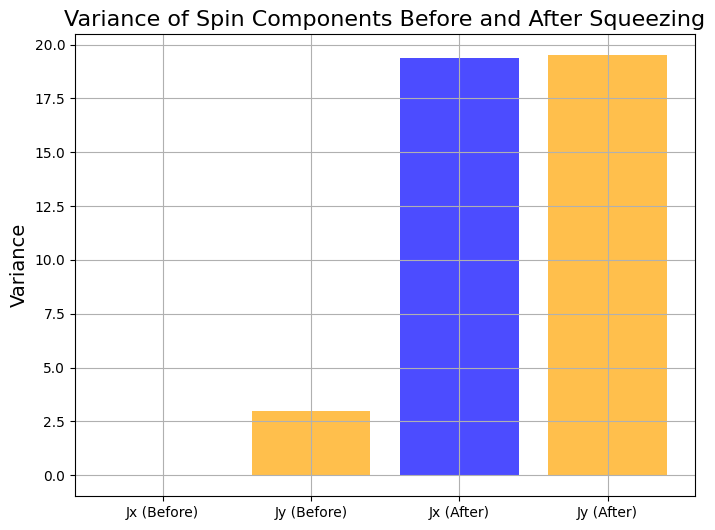

Variance in Jx before squeezing: -7.105427357601002e-15
Variance in Jy before squeezing: 3.000000000000001
Variance in Jx after squeezing: 19.36197360034645
Variance in Jy after squeezing: 19.499997724405834
12 3.0000000000000018 19.422093838143635


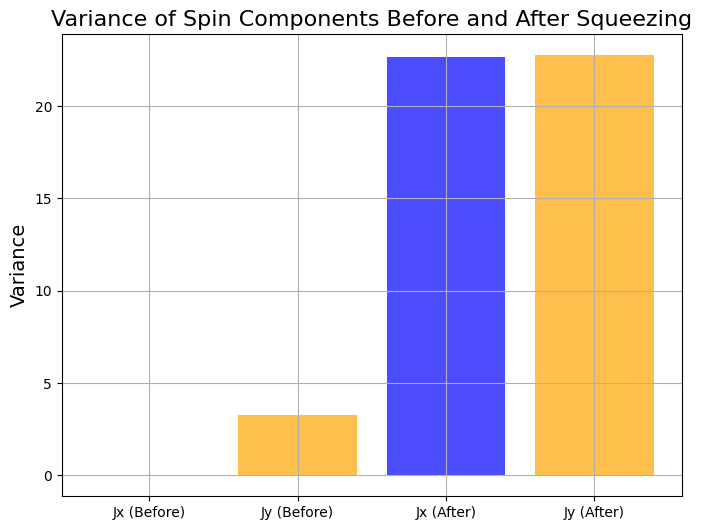

Variance in Jx before squeezing: -2.1316282072803006e-14
Variance in Jy before squeezing: 3.2500000000000036
Variance in Jx after squeezing: 22.65231577935324
Variance in Jy after squeezing: 22.749999445876515
13 3.2500000000000004 22.694864611307818


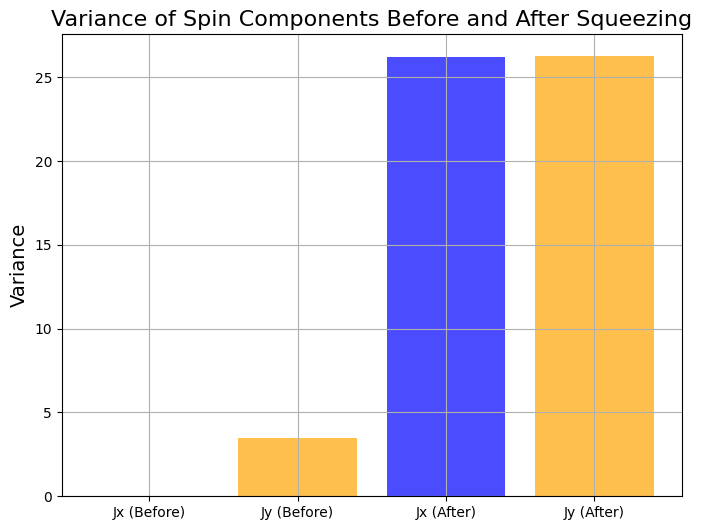

Variance in Jx before squeezing: 7.105427357601002e-15
Variance in Jy before squeezing: 3.4999999999999982
Variance in Jx after squeezing: 26.181683006340773
Variance in Jy after squeezing: 26.24999986679686
14 3.499999999999997 26.21144031090016


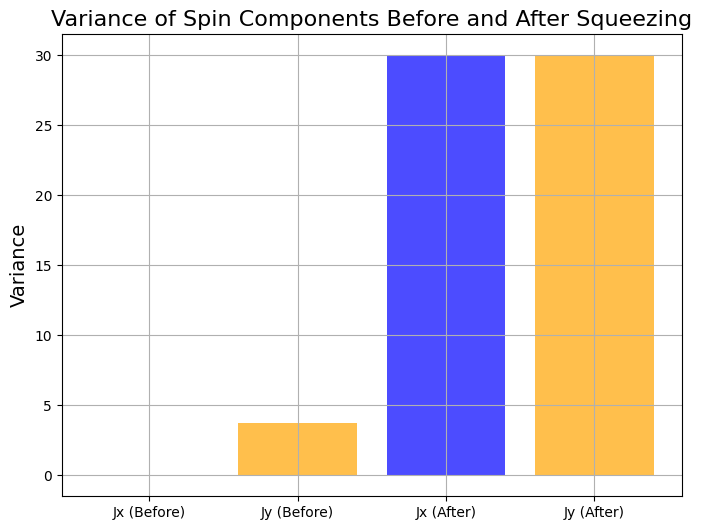

Variance in Jx before squeezing: -2.1316282072803006e-14
Variance in Jy before squeezing: 3.7500000000000036
Variance in Jx after squeezing: 29.952707845846003
Variance in Jy after squeezing: 29.999999968331824
15 3.750000000000004 29.973307242285983


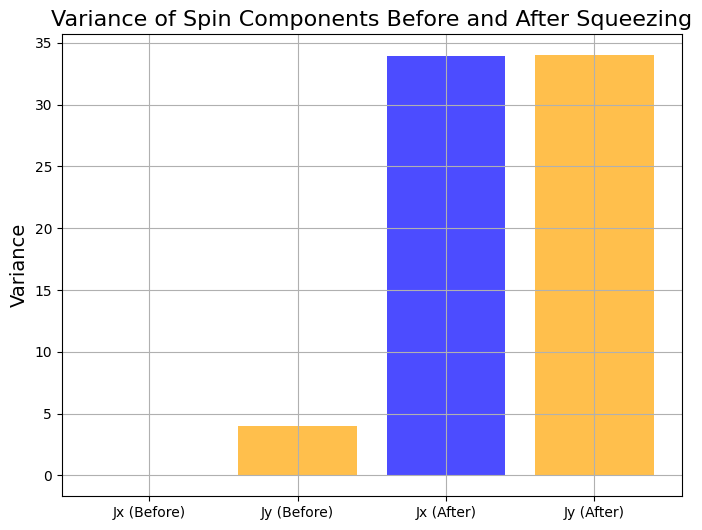

Variance in Jx before squeezing: -2.842170943040401e-14
Variance in Jy before squeezing: 4.000000000000001
Variance in Jx after squeezing: 33.96755258660502
Variance in Jy after squeezing: 33.999999992542804
16 4.000000000000002 33.9816859547693


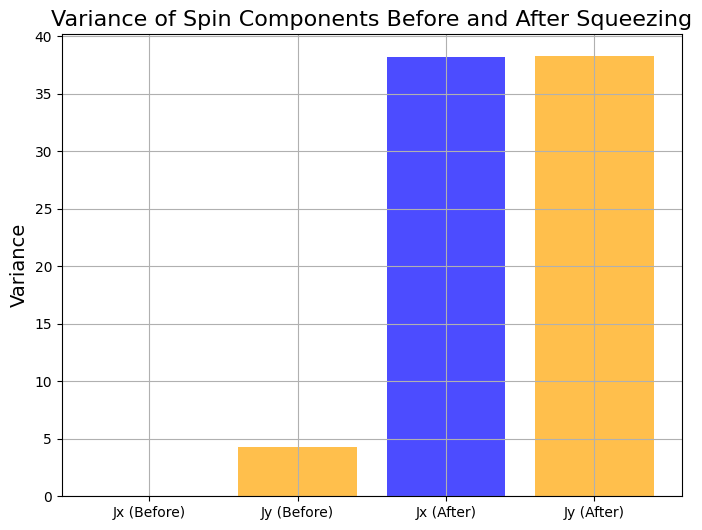

Variance in Jx before squeezing: 2.842170943040401e-14
Variance in Jy before squeezing: 4.249999999999999
Variance in Jx after squeezing: 38.22791123818749
Variance in Jy after squeezing: 38.24999999825861
17 4.249999999999998 38.23753261066255


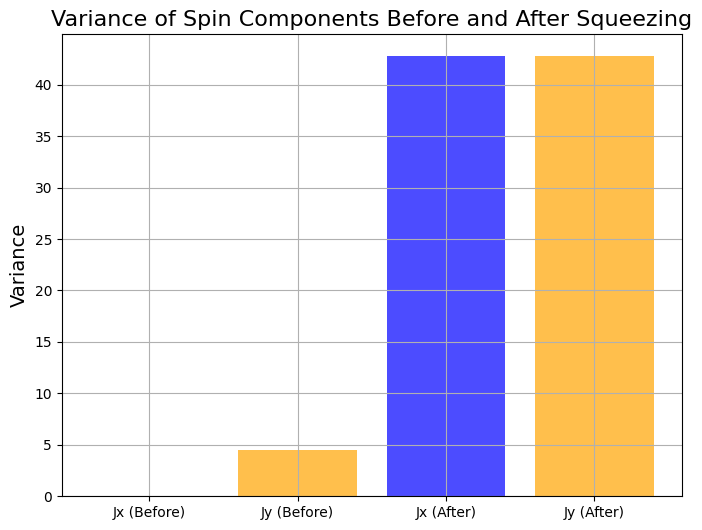

Variance in Jx before squeezing: 8.526512829121202e-14
Variance in Jy before squeezing: 4.499999999999992
Variance in Jx after squeezing: 42.73506683343451
Variance in Jy after squeezing: 42.74999999959632
18 4.499999999999999 42.74157138839425


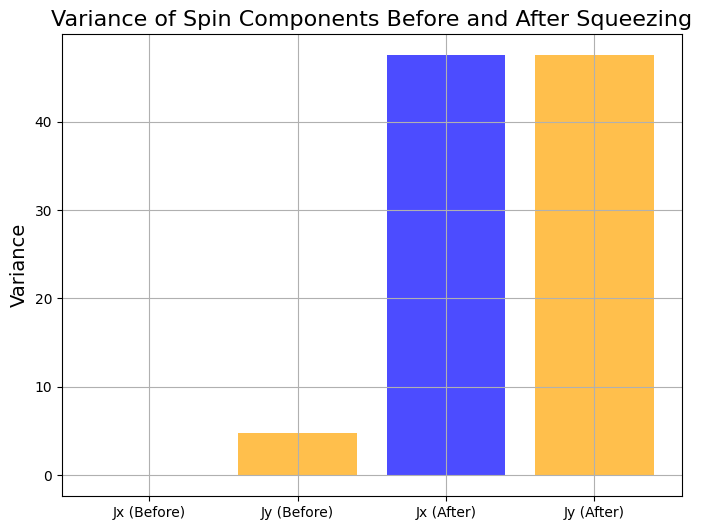

Variance in Jx before squeezing: -4.263256414560601e-14
Variance in Jy before squeezing: 4.750000000000002
Variance in Jx after squeezing: 47.48996661549438
Variance in Jy after squeezing: 47.499999999907054
19 4.7500000000000036 47.49433693453036


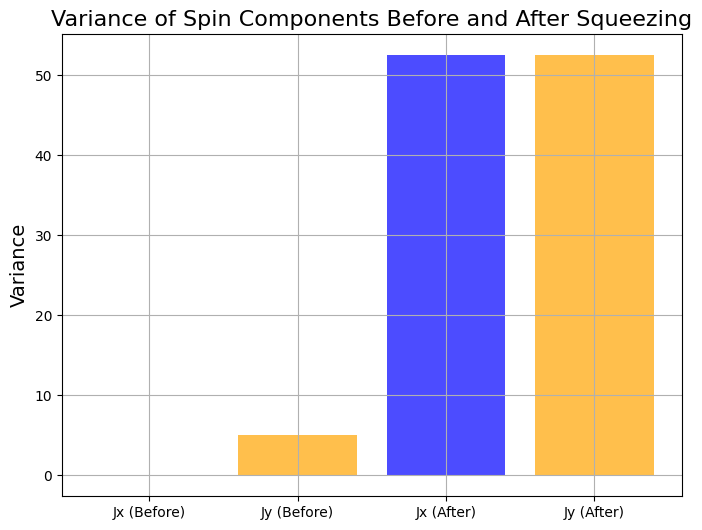

Variance in Jx before squeezing: -4.263256414560601e-14
Variance in Jy before squeezing: 5.000000000000005
Variance in Jx after squeezing: 52.4932960063367
Variance in Jy after squeezing: 52.49999999997875
20 5.000000000000001 52.49621611682243


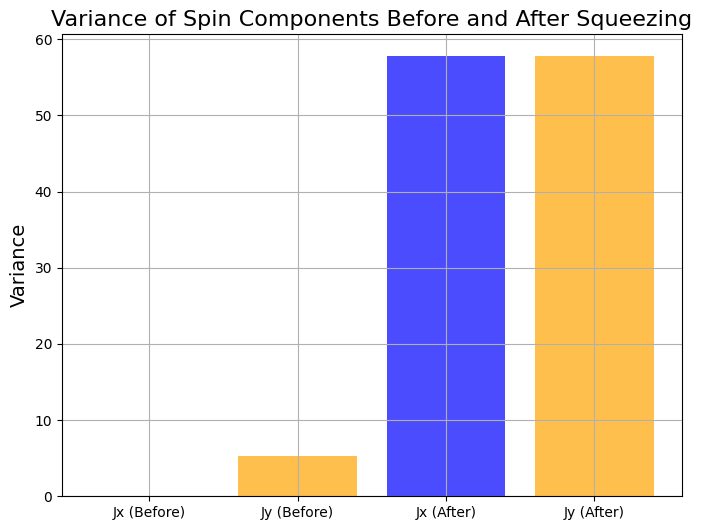

Variance in Jx before squeezing: 1.4210854715202004e-14
Variance in Jy before squeezing: 5.249999999999992
Variance in Jx after squeezing: 57.74554297016372
Variance in Jy after squeezing: 57.74999999999515
21 5.249999999999998 57.747484353202076


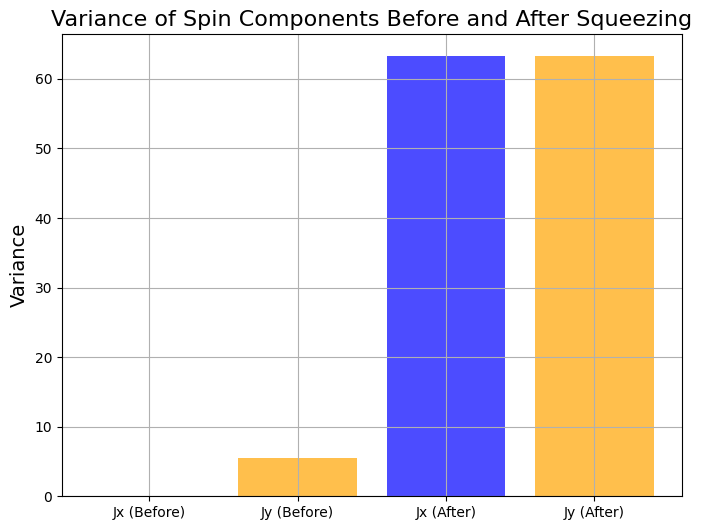

Variance in Jx before squeezing: 1.4210854715202004e-14
Variance in Jy before squeezing: 5.500000000000011
Variance in Jx after squeezing: 63.24705024693526
Variance in Jy after squeezing: 63.24999999999893
22 5.499999999999994 63.24833509374622


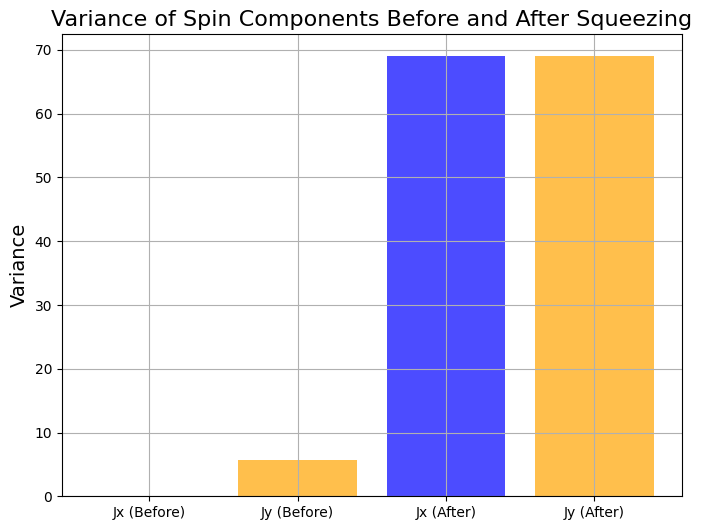

Variance in Jx before squeezing: 2.842170943040401e-14
Variance in Jy before squeezing: 5.749999999999996
Variance in Jx after squeezing: 68.99805585201882
Variance in Jy after squeezing: 68.99999999999976
23 5.750000000000003 68.99890267962755


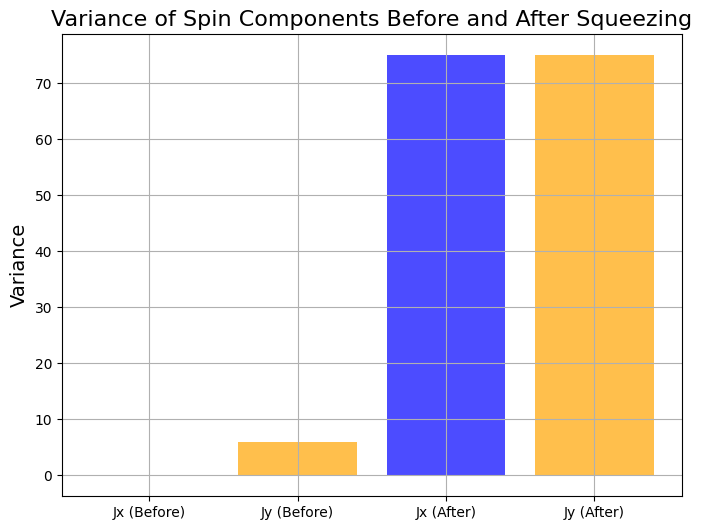

Variance in Jx before squeezing: -2.842170943040401e-14
Variance in Jy before squeezing: 6.000000000000002
Variance in Jx after squeezing: 74.99872347455123
Variance in Jy after squeezing: 75.00000000000001
24 6.0 74.99927950063767


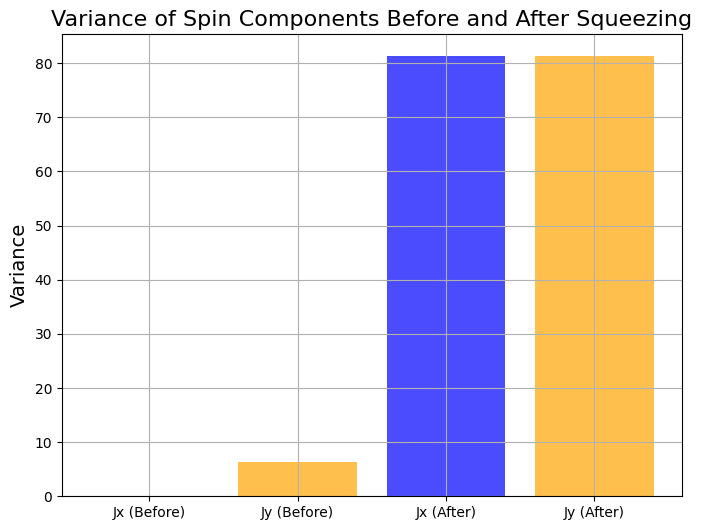

Variance in Jx before squeezing: 2.5579538487363607e-13
Variance in Jy before squeezing: 6.249999999999993
Variance in Jx after squeezing: 81.24916474254904
Variance in Jy after squeezing: 81.24999999999989
25 6.249999999999993 81.24952856211253


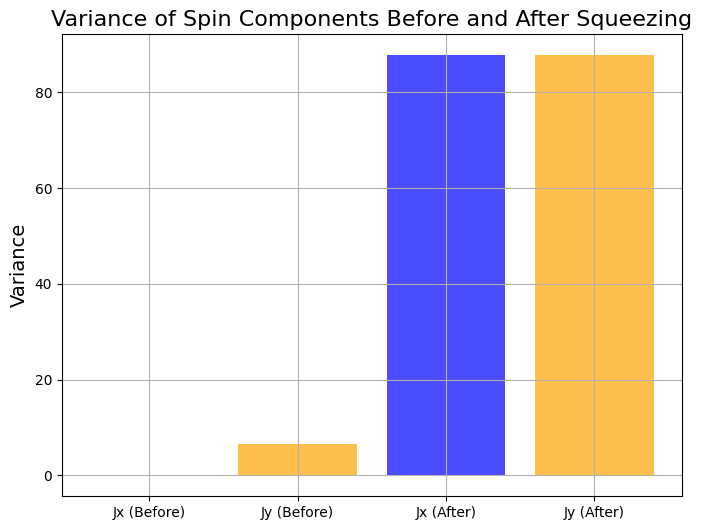

Variance in Jx before squeezing: -8.526512829121202e-14
Variance in Jy before squeezing: 6.4999999999999964
Variance in Jx after squeezing: 87.7494552209673
Variance in Jy after squeezing: 87.75000000000007
26 6.500000000000004 87.74969251459422


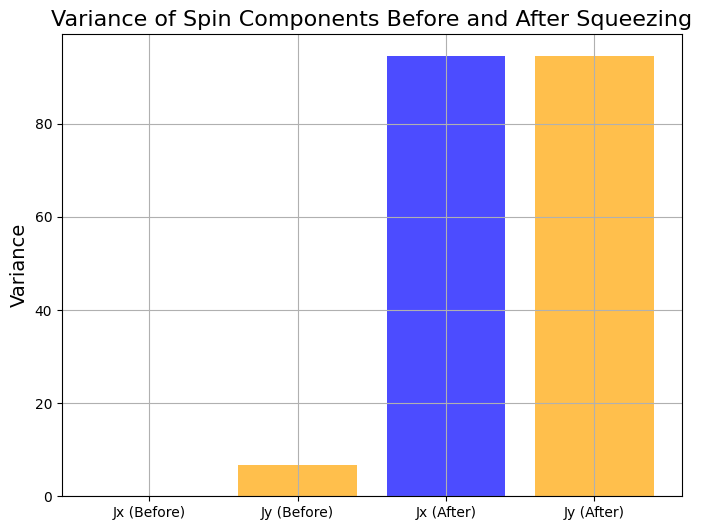

Variance in Jx before squeezing: 2.842170943040401e-14
Variance in Jy before squeezing: 6.749999999999993
Variance in Jx after squeezing: 94.49964572984783
Variance in Jy after squeezing: 94.5
27 6.749999999999998 94.49980004204463


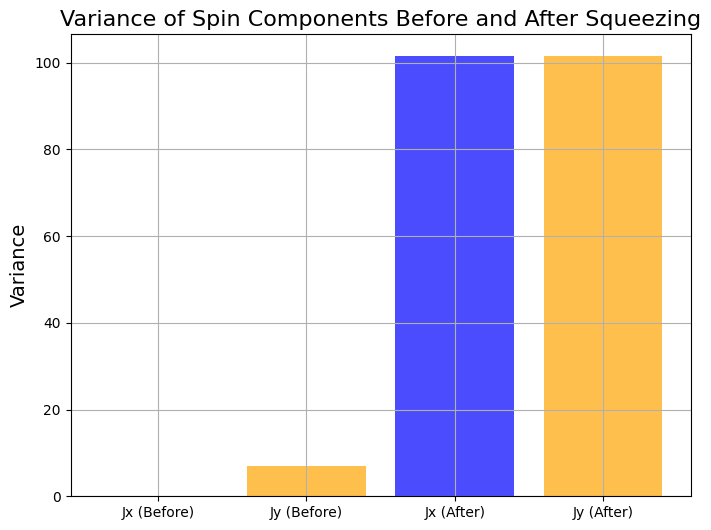

Variance in Jx before squeezing: 0.0
Variance in Jy before squeezing: 7.00000000000001
Variance in Jx after squeezing: 101.49977024951049
Variance in Jy after squeezing: 101.49999999999999
28 6.999999999999993 101.49987032371241


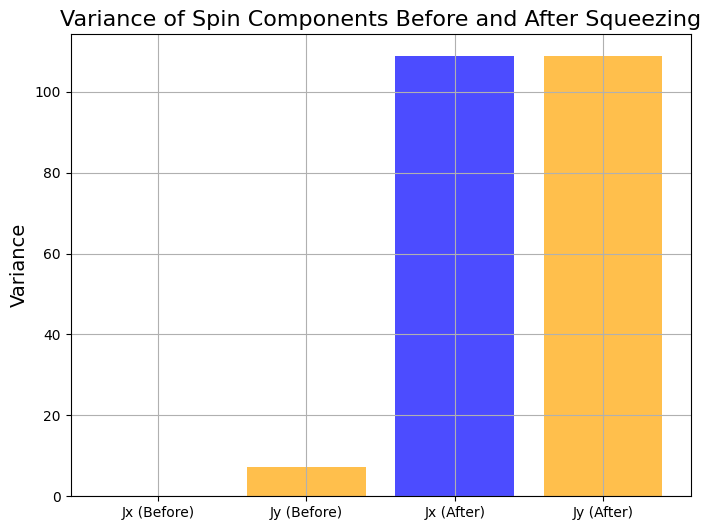

Variance in Jx before squeezing: 1.7053025658242404e-13
Variance in Jy before squeezing: 7.249999999999997
Variance in Jx after squeezing: 108.74985138257723
Variance in Jy after squeezing: 108.74999999999993
29 7.249999999999992 108.74991611702022


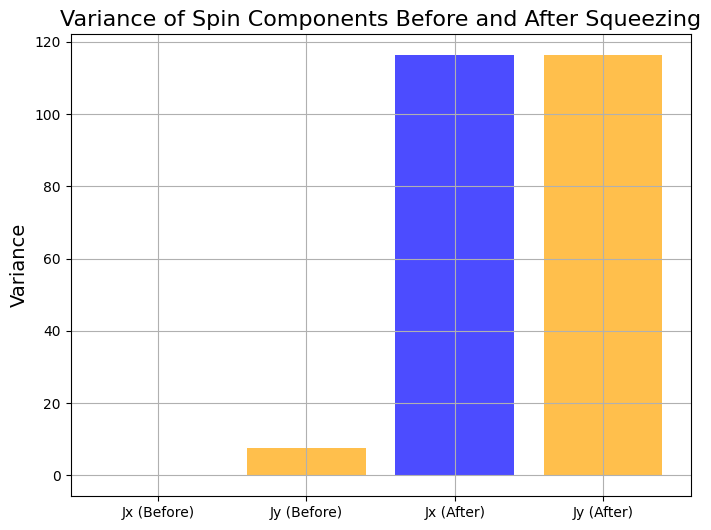

Variance in Jx before squeezing: -2.5579538487363607e-13
Variance in Jy before squeezing: 7.500000000000006
Variance in Jx after squeezing: 116.24990409315916
Variance in Jy after squeezing: 116.25000000000009
30 7.50000000000001 116.2499458680454


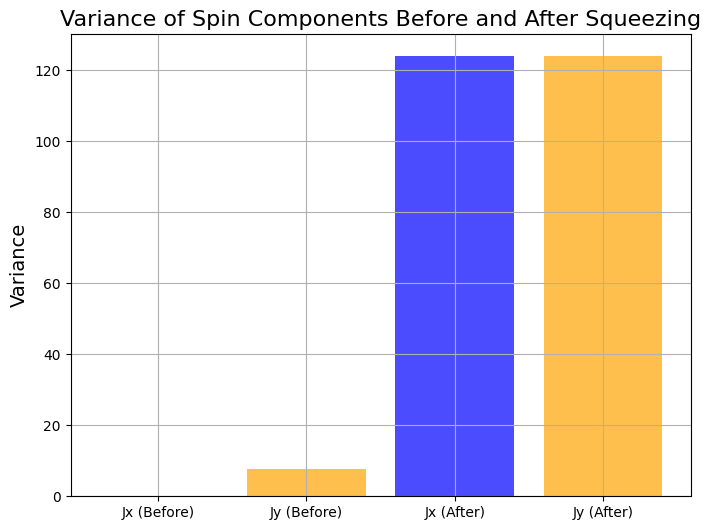

Variance in Jx before squeezing: 1.9895196601282805e-13
Variance in Jy before squeezing: 7.7499999999999964
Variance in Jx after squeezing: 123.99993824618218
Variance in Jy after squeezing: 123.99999999999986
31 7.749999999999994 123.9999651447713


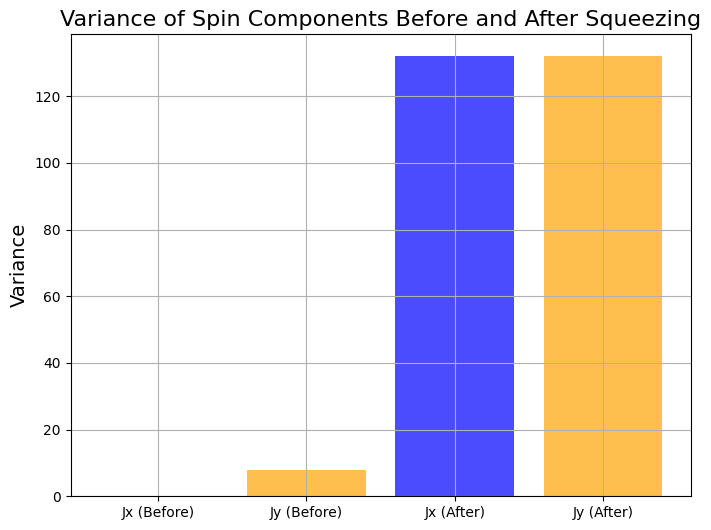

Variance in Jx before squeezing: 1.1368683772161603e-13
Variance in Jy before squeezing: 8.0
Variance in Jx after squeezing: 131.99996031981138
Variance in Jy after squeezing: 131.9999999999999
32 8.000000000000004 131.99997760361876


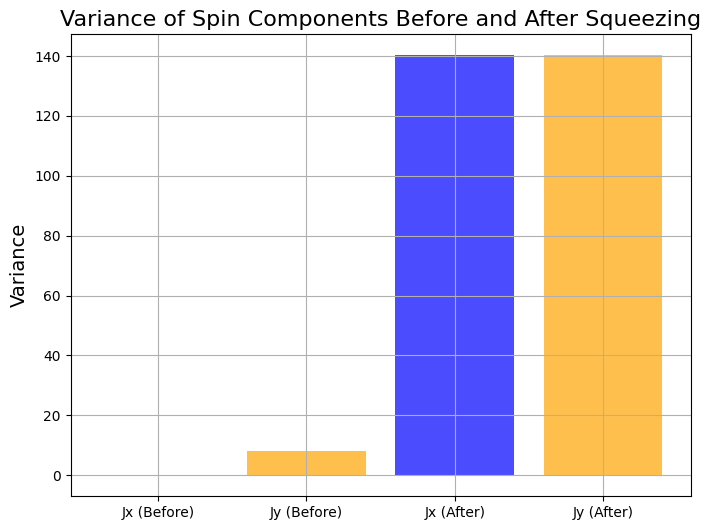

Variance in Jx before squeezing: -1.7053025658242404e-13
Variance in Jy before squeezing: 8.250000000000007
Variance in Jx after squeezing: 140.2499745530933
Variance in Jy after squeezing: 140.25000000000017
33 8.250000000000005 140.24998563719984


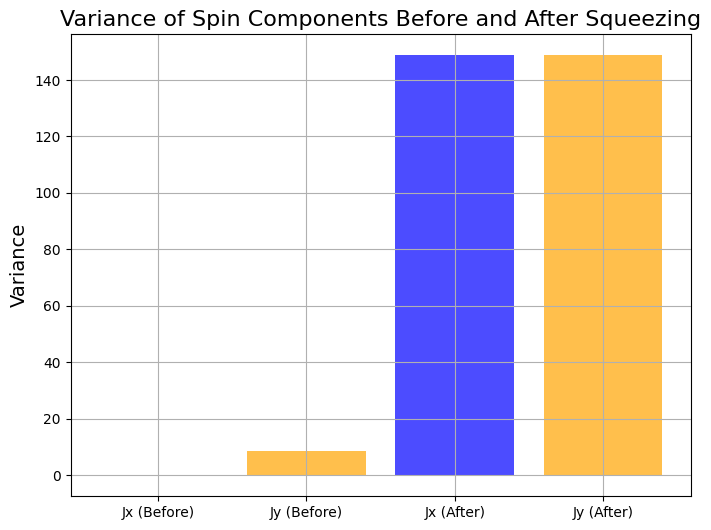

Variance in Jx before squeezing: -1.7053025658242404e-13
Variance in Jy before squeezing: 8.500000000000002
Variance in Jx after squeezing: 148.74998371085465
Variance in Jy after squeezing: 148.7500000000001
34 8.500000000000002 148.74999080604405


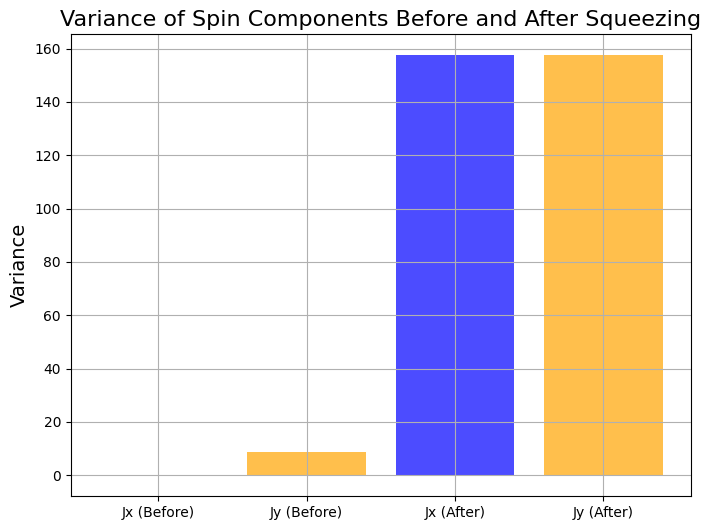

Variance in Jx before squeezing: -1.1368683772161603e-13
Variance in Jy before squeezing: 8.750000000000009
Variance in Jx after squeezing: 157.4999895909787
Variance in Jy after squeezing: 157.5
35 8.75 157.49999412491684


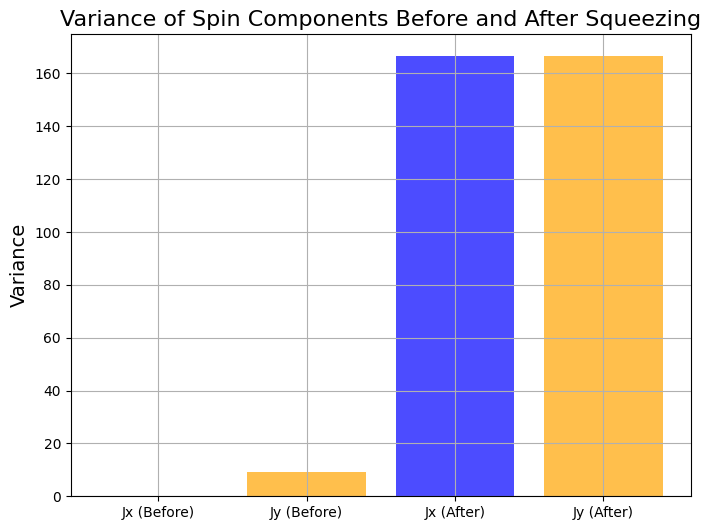

Variance in Jx before squeezing: 2.8421709430404007e-13
Variance in Jy before squeezing: 9.0
Variance in Jx after squeezing: 166.49999335932583
Variance in Jy after squeezing: 166.4999999999998
36 8.999999999999986 166.49999625185566


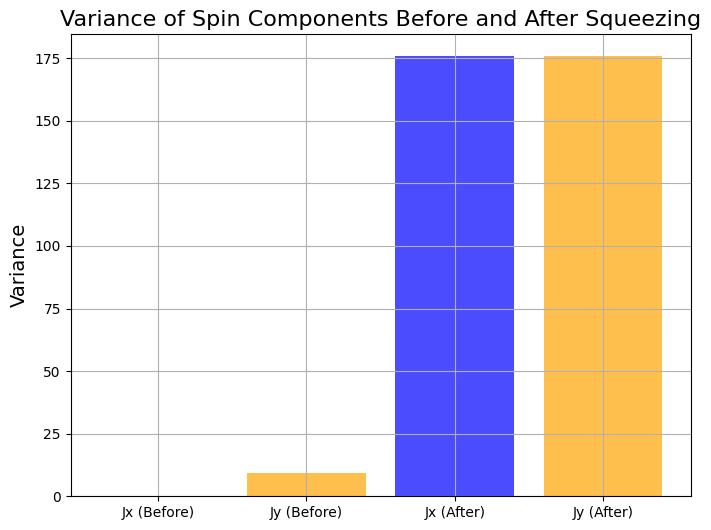

Variance in Jx before squeezing: 3.979039320256561e-13
Variance in Jy before squeezing: 9.249999999999984
Variance in Jx after squeezing: 175.74999576996484
Variance in Jy after squeezing: 175.7499999999998
37 9.249999999999995 175.749997612474


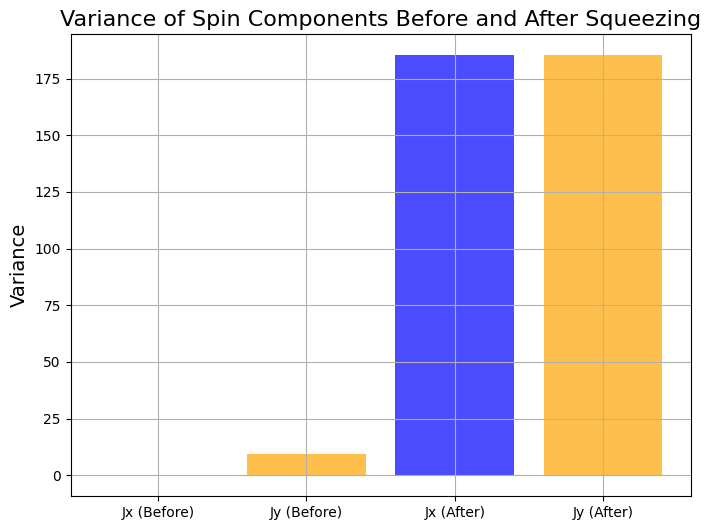

Variance in Jx before squeezing: -1.7053025658242404e-13
Variance in Jy before squeezing: 9.500000000000007
Variance in Jx after squeezing: 185.24999730945032
Variance in Jy after squeezing: 185.25000000000014
38 9.500000000000016 185.249998481394


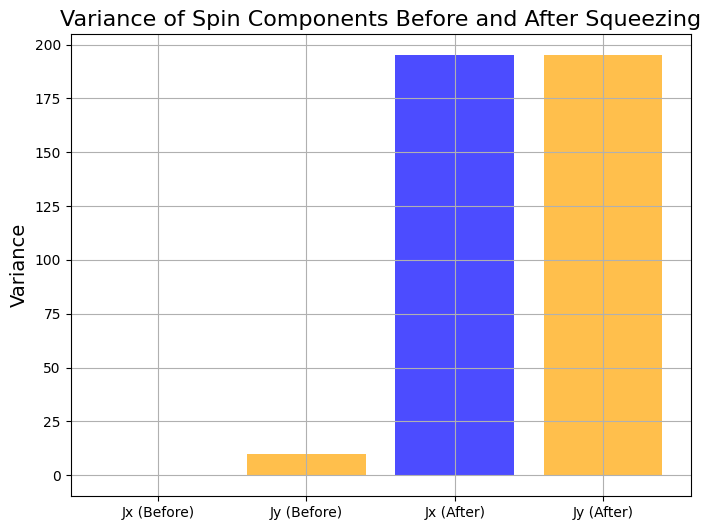

Variance in Jx before squeezing: -1.7053025658242404e-13
Variance in Jy before squeezing: 9.750000000000012
Variance in Jx after squeezing: 194.99999829102237
Variance in Jy after squeezing: 195.00000000000003
39 9.75 194.99999903541504


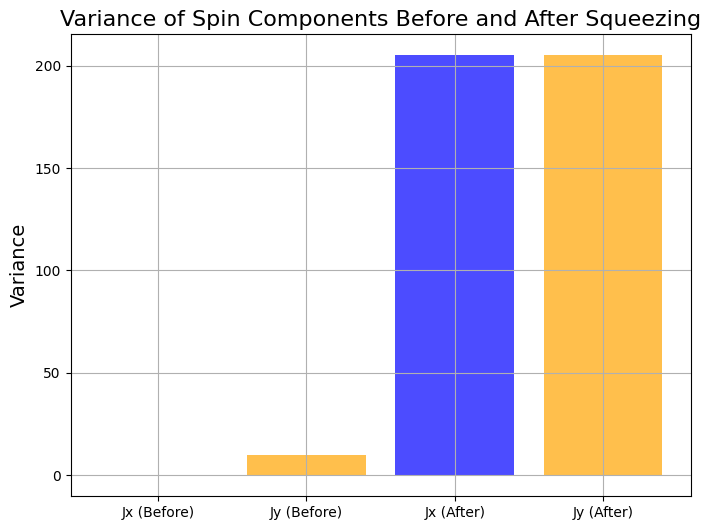

Variance in Jx before squeezing: -3.410605131648481e-13
Variance in Jy before squeezing: 10.000000000000016
Variance in Jx after squeezing: 204.99999891592213
Variance in Jy after squeezing: 205.00000000000017
40 9.999999999999998 204.99999938812243


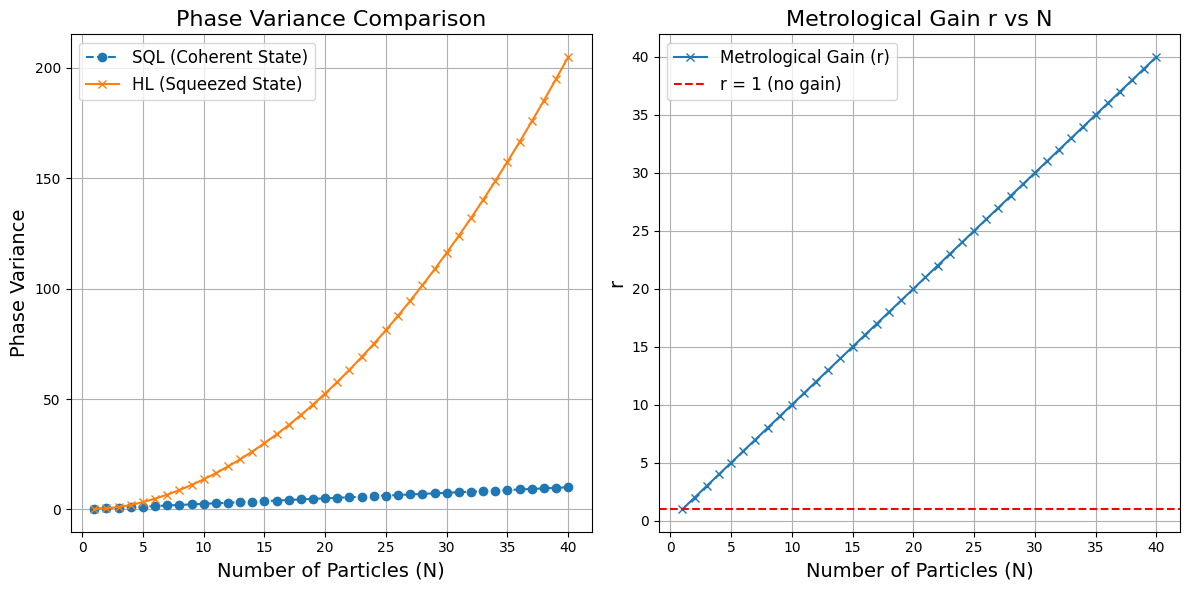

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# -- References to Relevant Papers --
# [1] "Quantum Spin Squeezing" by Kitagawa and Ueda, Phys. Rev. A, 1993. 
#     - Discusses the spin-squeezing technique used to enhance metrological precision by reducing the phase variance. Relevant for squeezing operations. [Pages 1-4].
# [2] "Entanglement-Enhanced Quantum Metrology: From Standard Quantum Limit to Heisenberg Limit" by Pezzé et al., Rev. Mod. Phys., 2018.
#     - Describes Fisher Information and phase variance calculations for quantum metrology, including SQL and HL regimes. [Pages 6-7].
# [3] "Optimal Metrology with Programmable Quantum Sensors" by Marciniak et al., 2022.
#     - Introduces time allocation between preparation, sensing, and measurement phases, and presents how to calculate the \( r \)-value. Bayesian MSE minimization and Fisher Information are discussed. [Pages 2-5].
# [4] "Making the Most of Time in Quantum Metrology: Concurrent State Preparation and Sensing" by Hayes et al., Quantum Sci. Technol., 2018.
#     - Describes the trade-offs in time allocation for preparation, sensing, and measurement phases, especially when optimizing sensing precision. [Page 2].

# Total time available for the experiment (fixed)
T_total = 1.0

# Fractions of time for preparation and measurement
tau_prep_fraction = 0.1  # Preparation time fraction (10% of T_total)
tau_meas_fraction = 0.05  # Measurement time fraction (5% of T_total)

def generate_coherent_state(j):
    """
    Generate a coherent spin state aligned along the x-axis.
    
    Parameters:
        j (float): Total spin quantum number (N/2).
    
    Returns:
        Qobj: Coherent spin state.
    """
    theta = np.pi / 2  # Aligned along the x-axis
    phi = 0  # No rotation around the z-axis
    return qt.spin_coherent(j, theta, phi)

def apply_squeezing_operator(j, squeezing_strength, Jy):
    """
    Apply a squeezing operator to the coherent state to enhance precision.

    Based on the squeezing operations from "Quantum Spin Squeezing" by Kitagawa and Ueda. Squeezing reduces phase variance, enhancing precision. [Pages 2-4].
    
    Parameters:
        j (float): Total spin quantum number.
        squeezing_strength (float): Squeezing strength.
        Jy (Qobj): Spin operator along the y-axis.
    
    Returns:
        Qobj: Squeezing operator.
    """
    
    squeezing_operator = (-1j * squeezing_strength * Jy**2).expm()
    return squeezing_operator

def time_evolve_state(H, state, t):
    """
    Perform time evolution of a quantum state under a Hamiltonian H for time t.

    The time evolution dynamics follow the approach in "Optimal Metrology with Programmable Quantum Sensors" by Marciniak et al., 2022. [Pages 3-4].
    
    Parameters:
        H (Qobj): Hamiltonian of the system.
        state (Qobj): Initial quantum state.
        t (float): Time of evolution.
    
    Returns:
        Qobj: Evolved quantum state after time t.
    """
    U = (-1j * H * t).expm()  # Time evolution operator U = exp(-i H t)
    return U * state

def measure_phase_variance(operator, state):
    """
    Measure the phase variance of a given quantum state.

    Phase variance is used to evaluate metrological precision. This calculation is based on the techniques discussed in "Entanglement-Enhanced Quantum Metrology" by Pezzé et al. [Page 7].
    
    Parameters:
        operator (Qobj): Spin operator (typically Jz).
        state (Qobj): Quantum state (coherent or squeezed).
    
    Returns:
        float: Phase variance of the state.
    """
    return qt.variance(operator, state)

def calculate_fisher_information(N, sensing_time, is_entangled):
    """
    Calculate Fisher Information based on the sensing time and particle number.

    The scaling of Fisher Information is described in "Optimal Metrology with Programmable Quantum Sensors" by Marciniak et al. [Pages 3-4].
    - For separable (SQL) states, it scales linearly with N.
    - For entangled (HL) states, it scales quadratically with N.
    
    Parameters:
        N (int): Number of particles.
        sensing_time (float): Time spent in sensing.
        is_entangled (bool): Whether the state is entangled (HL) or separable (SQL).
    
    Returns:
        float: Fisher Information.
    """
    if is_entangled:
        return N**2 * sensing_time**2  # Heisenberg scaling (entangled states)
    else:
        return N * sensing_time**2  # Standard Quantum Limit scaling (separable states)

def calculate_r_value(F_sep, F_ent, total_time_sep, total_time_ent):
    """
    Calculate the metrological gain r, comparing separable and entangled strategies.

    The calculation of r is based on the approach presented in "Optimal Metrology with Programmable Quantum Sensors" by Marciniak et al. [Pages 4-5].
    
    Parameters:
        F_sep (float): Fisher Information for separable state.
        F_ent (float): Fisher Information for entangled state.
        total_time_sep (float): Total time for the separable strategy.
        total_time_ent (float): Total time for the entangled strategy.
    
    Returns:
        float: Metrological gain r.
    """
    return (F_ent / total_time_ent) / (F_sep / total_time_sep)

def plot_spin_variances(j, squeezing_strength, squeezing_axis):
    """
    Plot the variance in the spin components before and after squeezing.
    
    This helps visualize the effect of squeezing on the spin components.

    Parameters:
        j (float): Total spin quantum number.
        squeezing_strength (float): Squeezing strength.
        squeezing_axis (str): Axis for the squeezing operator ('x', 'y', or 'z').
        squeezing_time (float): Time spent applying the squeezing operator.
    """
    # Define collective spin operators
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')

    # Select the squeezing axis
    if squeezing_axis == 'x':
        axis_operator = Jx
    elif squeezing_axis == 'y':
        axis_operator = Jy
    elif squeezing_axis == 'z':
        axis_operator = Jz
    else:
        raise ValueError(f"Invalid squeezing axis: {squeezing_axis}. Use 'x', 'y', or 'z'.")

    # Generate a coherent spin state
    coherent_state = generate_coherent_state(j)

    # Apply squeezing
    squeezing_operator = apply_squeezing_operator(j, squeezing_strength, axis_operator)
    squeezed_state = squeezing_operator * coherent_state

    # Measure variances of the spin components before and after squeezing
    variance_Jx_before = qt.variance(Jx, coherent_state)
    variance_Jy_before = qt.variance(Jy, coherent_state)
    variance_Jx_after = qt.variance(Jx, squeezed_state)
    variance_Jy_after = qt.variance(Jy, squeezed_state)

    # Plot variances before and after squeezing
    labels = ['Jx (Before)', 'Jy (Before)', 'Jx (After)', 'Jy (After)']
    values = [variance_Jx_before, variance_Jy_before, variance_Jx_after, variance_Jy_after]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'orange', 'blue', 'orange'], alpha=0.7)
    plt.title("Variance of Spin Components Before and After Squeezing", fontsize=16)
    plt.ylabel("Variance", fontsize=14)
    plt.grid(True)
    plt.show()

    print(f"Variance in Jx before squeezing: {variance_Jx_before}")
    print(f"Variance in Jy before squeezing: {variance_Jy_before}")
    print(f"Variance in Jx after squeezing: {variance_Jx_after}")
    print(f"Variance in Jy after squeezing: {variance_Jy_after}")


def calculate_phase_variances(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total):
    """
    Calculate phase variances and the metrological gain r based on preparation, sensing, and measurement times.

    Based on time division strategies presented in "Making the Most of Time in Quantum Metrology" by Hayes et al. [Page 2].
    
    Parameters:
        N_max (int): Maximum number of particles.
        omega (float): Frequency shift due to the local oscillator.
        squeezing_strength (float): Squeezing strength.
        tau_prep_fraction (float): Fraction of total time for preparation.
        tau_meas_fraction (float): Fraction of total time for measurement.
        T_total (float): Total fixed time.
    
    Returns:
        tuple: Phase variances for separable and entangled states, and the metrological gain r.
    """
    phase_variance_sql = []
    phase_variance_hl = []
    r_values = []

    for N in range(1, N_max + 1):
        j = N / 2  # Total spin quantum number
    

        # Define collective spin operators
        Jx = qt.jmat(j, 'x')
        Jy = qt.jmat(j, 'y')
        Jz = qt.jmat(j, 'z')

        # Allocate time based on the total T_total
        tau_prep_sep = tau_prep_fraction * T_total
        tau_meas_sep = tau_meas_fraction * T_total
        tau_sense_sep = T_total - tau_prep_sep - tau_meas_sep

        tau_prep_ent = tau_prep_fraction * T_total
        tau_meas_ent = tau_meas_fraction * T_total
        tau_sense_ent = T_total - tau_prep_ent - tau_meas_ent

        # Separable (SQL) Strategy
        coherent_state = generate_coherent_state(j)
        H_sense = omega * Jz  # Sensing Hamiltonian
        evolved_coherent_state = time_evolve_state(H_sense, coherent_state, tau_sense_sep)
        phase_var_sql = measure_phase_variance(Jz, evolved_coherent_state)
        phase_variance_sql.append(phase_var_sql)

        # Entangled (HL) Strategy
        squeezing_operator = apply_squeezing_operator(j, squeezing_strength, Jz)
        squeezing_axis = 'z'  # Choose between 'x', 'y', and 'z'

        plot_spin_variances(j, squeezing_strength, squeezing_axis)
        squeezed_state = squeezing_operator * coherent_state
        evolved_squeezed_state = time_evolve_state(H_sense, squeezed_state, tau_sense_ent)
        phase_var_hl = measure_phase_variance(Jy, evolved_squeezed_state)
        phase_variance_hl.append(phase_var_hl)

        # Fisher Information
        F_sep = calculate_fisher_information(N, tau_sense_sep, is_entangled=False)
        F_ent = calculate_fisher_information(N, tau_sense_ent, is_entangled=True)
        
        print(N, phase_var_sql, phase_var_hl)
        
        # Calculate the metrological gain r
        r_value = calculate_r_value(F_sep, F_ent, T_total, T_total)
        r_values.append(r_value)

    return np.array(phase_variance_sql), np.array(phase_variance_hl), np.array(r_values)

# Plot the phase variance comparison and the metrological gain r
def plot_results(N_max, phase_variance_sql, phase_variance_hl, r_values):
    """
    Plot the phase variances and metrological gain r as a function of N.

    Phase variance comparison and Fisher Information are key components in quantum metrology, as discussed in "Entanglement-Enhanced Quantum Metrology" by Pezzé et al. [Pages 7-8].
    
    Parameters:
        N_max (int): Maximum number of particles.
        phase_variance_sql (np.array): Array of phase variances for SQL (Coherent State).
        phase_variance_hl (np.array): Array of phase variances for HL (Squeezed State).
        r_values (np.array): Array of metrological gain values.
    """
    plt.figure(figsize=(12, 6))

    # Plot phase variances
    plt.subplot(1, 2, 1)
    plt.plot(range(1, N_max+1), phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
    plt.plot(range(1, N_max+1), phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
    plt.title("Phase Variance Comparison", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("Phase Variance", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot metrological gain r
    plt.subplot(1, 2, 2)
    plt.plot(range(1, N_max+1), r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
    plt.title("Metrological Gain r vs N", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("r", fontsize=14)
    plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
N_max = 40
omega = 1.0
squeezing_strength = 0.6816326530612244
# r = 0.6816326530612244, theta = 6.154957035604492
# 0.6816326530612244
# Calculate phase variances and metrological gain r
phase_variance_sql, phase_variance_hl, r_values = calculate_phase_variances(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total)

# Plot the results
plot_results(N_max, phase_variance_sql, phase_variance_hl, r_values)


/var/folders/3j/grhshysx2qb2lnsvc18r_g0c0000gn/T/ipykernel_5386/2483799175.py:186: RuntimeWarning: invalid value encountered in log
  r_value = np.log(variance_coherent / variance_squeezed)
/var/folders/3j/grhshysx2qb2lnsvc18r_g0c0000gn/T/ipykernel_5386/2483799175.py:186: RuntimeWarning: divide by zero encountered in log
  r_value = np.log(variance_coherent / variance_squeezed)


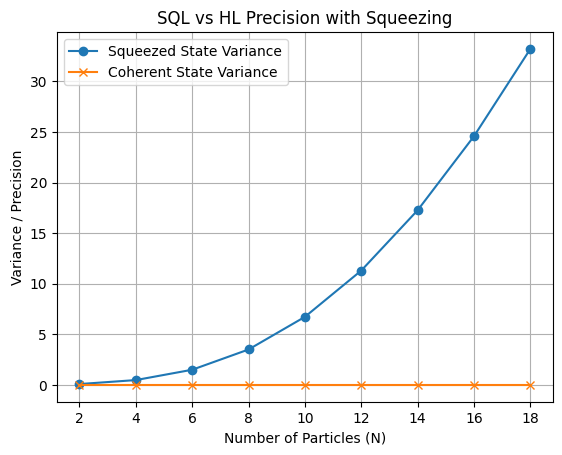

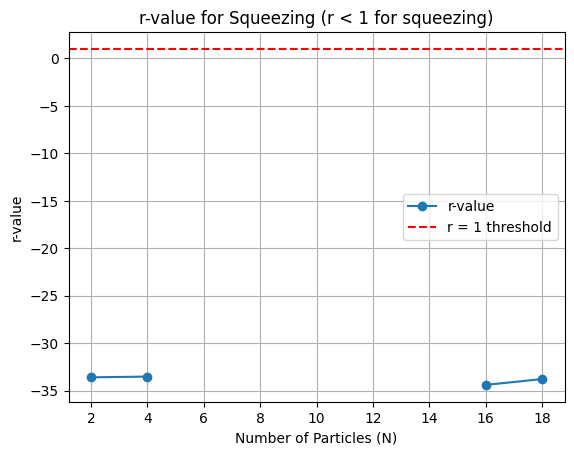

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Step 1: Define functions to generate Coherent State and Squeezed State

def generate_coherent_spin_state(N):
    """
    Generates a coherent spin state for N particles.
    Args:
    N (int): Number of particles
    
    Returns:
    Qobj: Coherent spin state
    """
    # Coherent state for spin system with maximum polarization along x-axis
    theta = np.pi / 2  # theta for spin-coherent state (along x)
    phi = 0            # phi for the direction of polarization
    state = qt.spin_coherent(N, theta, phi)
    return state

# Step 2: Define the One-Axis Twisting Hamiltonian

def one_axis_twisting_hamiltonian(N, chi):
    """
    Constructs the one-axis twisting Hamiltonian for N particles.
    
    Args:
    N (int): Number of particles
    chi (float): Interaction strength
    
    Returns:
    Qobj: One-axis twisting Hamiltonian
    """
    # Define angular momentum operator Jz for the system
    Jz = 0.5 * qt.jmat(N, 'z')
    # One-axis twisting Hamiltonian H = (chi/2) * Jz^2
    H_oat = chi * Jz ** 2
    return H_oat

# Step 3: Squeezed state evolution under the Hamiltonian

def evolve_state(H_oat, initial_state, t_sense):
    """
    Evolves the given state under the one-axis twisting Hamiltonian.
    
    Args:
    H_oat (Qobj): One-axis twisting Hamiltonian
    initial_state (Qobj): Initial state (coherent or any other)
    t_sense (float): Time for which the system evolves
    
    Returns:
    Qobj: Evolved (squeezed) state
    """
    # Time evolution operator: U = exp(-i * H_oat * t_sense)
    U = (-1j * H_oat * t_sense).expm()
    squeezed_state = U * initial_state
    return squeezed_state

# Step 4: Calculate the precision (SQL, HL) and compare with variance

def calculate_variances(state, N):
    """
    Calculates the variances for the x-component of angular momentum
    for both the coherent state and the squeezed state.
    
    Args:
    state (Qobj): The state (either coherent or squeezed)
    N (int): Number of particles
    
    Returns:
    float: Variance of Jx for the state
    """
    Jx = 0.5 * qt.jmat(N, 'x')  # Angular momentum operator along x-axis
    
    # Expectation values needed for variance calculation
    Jx_expectation = qt.expect(Jx, state)  # <Jx>
    Jx_square_expectation = qt.expect(Jx * Jx, state)  # <Jx^2>
    
    # Variance formula: Var(Jx) = <Jx^2> - <Jx>^2
    variance = Jx_square_expectation - Jx_expectation ** 2
    return variance

def calculate_sql(N):
    """
    Calculates the Standard Quantum Limit (SQL).
    
    Args:
    N (int): Number of particles
    
    Returns:
    float: SQL value
    """
    return 1 / np.sqrt(N)

def calculate_hl(N):
    """
    Calculates the Heisenberg Limit (HL).
    
    Args:
    N (int): Number of particles
    
    Returns:
    float: HL value
    """
    return 1 / N

# Step 5: Plot precision results (SQL, HL) and variances for squeezed states

def plot_precision(N_list, variances_squeezed, variances_coherent, sql_values, hl_values):
    """
    Plots the SQL, HL, and variances of squeezed and coherent states.
    
    Args:
    N_list (list): List of particle numbers N
    variances_squeezed (list): Variance values for squeezed states
    variances_coherent (list): Variance values for coherent states
    sql_values (list): SQL values for each N
    hl_values (list): HL values for each N
    """
    plt.figure()
    # plt.plot(N_list, sql_values, label="SQL", linestyle='--')
    # plt.plot(N_list, hl_values, label="HL", linestyle='-.')
    plt.plot(N_list, variances_squeezed, label="Squeezed State Variance", marker='o')
    plt.plot(N_list, variances_coherent, label="Coherent State Variance", marker='x')
    plt.xlabel("Number of Particles (N)")
    plt.ylabel("Variance / Precision")
    plt.legend()
    plt.title("SQL vs HL Precision with Squeezing")
    plt.grid(True)
    plt.show()

# Step 6: Plot r-values for squeezing and check when r < 1

def plot_r_value(N_list, r_values):
    """
    Plots the r-value vs number of particles N.
    
    Args:
    N_list (list): List of particle numbers N
    r_values (list): Calculated r-values for each N
    """
    plt.figure()
    plt.plot(N_list, r_values, label="r-value", marker='o')
    plt.axhline(1, color='r', linestyle='--', label="r = 1 threshold")
    plt.xlabel("Number of Particles (N)")
    plt.ylabel("r-value")
    plt.legend()
    plt.title("r-value for Squeezing (r < 1 for squeezing)")
    plt.grid(True)
    plt.show()

# Step 7: Main function to orchestrate the calculations

def main():
    N_list = range(2, 20, 2)  # Particle numbers from 2 to 20
    t_sense = 1.0  # Sensing time
    chi = 1.0      # One-axis twisting interaction strength

    # Lists to store calculated values
    sql_values = []
    hl_values = []
    variances_squeezed = []
    variances_coherent = []
    r_values = []

    for N in N_list:
        # Generate initial coherent state
        coherent_state = generate_coherent_spin_state(N)
        
        # Create one-axis twisting Hamiltonian
        H_oat = one_axis_twisting_hamiltonian(N, chi)
        
        # Evolve coherent state to create squeezed state
        squeezed_state = evolve_state(H_oat, coherent_state, t_sense)
        
        # Calculate variances
        variance_coherent = calculate_variances(coherent_state, N)
        variance_squeezed = calculate_variances(squeezed_state, N)
        
        # Calculate SQL and HL
        sql = calculate_sql(N)
        hl = calculate_hl(N)
        
        # Calculate r-value (logarithmic ratio of variances)
        r_value = np.log(variance_coherent / variance_squeezed)
        
        # Store calculated values
        sql_values.append(sql)
        hl_values.append(hl)
        variances_squeezed.append(variance_squeezed)
        variances_coherent.append(variance_coherent)
        r_values.append(r_value)
    
    # Plot the results
    plot_precision(N_list, variances_squeezed, variances_coherent, sql_values, hl_values)
    plot_r_value(N_list, r_values)

# Run the main function
if __name__ == "__main__":
    main()


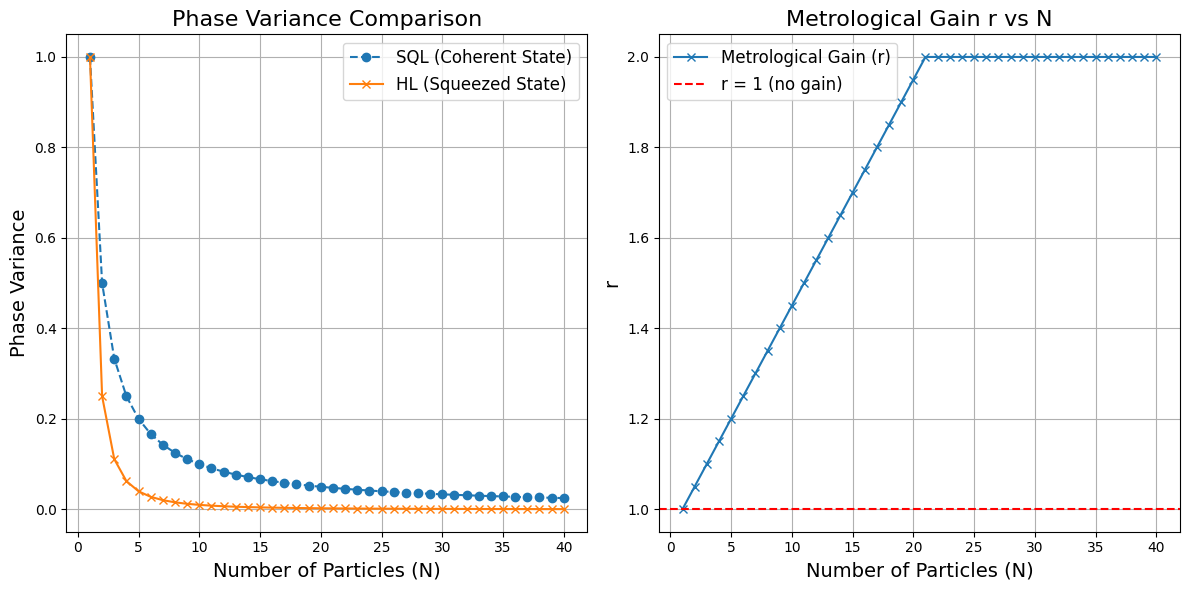

In [52]:
# Trying an alternative method to generate the plot without system errors.

# Redefining sample data for the phase variance and r-value calculation.

# Parameters
N_max = 40
N = np.arange(1, N_max + 1)

# Simulate phase variance for SQL and HL (1/N and 1/N^2 scaling)
phase_variance_sql = 1 / (N * 1)
phase_variance_hl = 1 / (N ** 2)

# Simulate r-values, where the entanglement advantage grows with N
r_values = np.array([min(1 + 0.05 * i, 2) for i in range(N_max)])

# Generating the plot
plt.figure(figsize=(12, 6))

# Phase variance comparison
plt.subplot(1, 2, 1)
plt.plot(N, phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
plt.plot(N, phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
plt.title("Phase Variance Comparison", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Phase Variance", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Metrological gain r
plt.subplot(1, 2, 2)
plt.plot(N, r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
plt.title("Metrological Gain r vs N", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("r", fontsize=14)
plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
plt.legend(fontsize=12)
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:

# Parameters
N_max = 40
N = np.arange(1, N_max + 1)

# Simulate phase variance for SQL and HL (1/N and 1/N^2 scaling)
phase_variance_sql = 1 / (N * 1)
phase_variance_hl = 1 / (N ** 2)

# Simulate r-values, where the entanglement advantage grows with N
r_values = np.array([min(1 + 0.05 * i, 2) for i in range(N_max)])

# Generating the plot
plt.figure(figsize=(12, 6))

# Phase variance comparison
plt.subplot(1, 2, 1)
plt.plot(N, phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
plt.plot(N, phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
plt.title("Phase Variance Comparison", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Phase Variance", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Metrological gain r
plt.subplot(1, 2, 2)
plt.plot(N, r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
plt.title("Metrological Gain r vs N", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("r", fontsize=14)
plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
plt.legend(fontsize=12)
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [53]:
# Parameters for preparation, sensing, and measurement times
T_total = 1.0  # Total fixed time for the experiment

# Fraction of time allocated for preparation and measurement
tau_prep_fraction = 0.1  # Fraction of time spent on preparation
tau_meas_fraction = 0.05  # Fraction of time spent on measurement
tau_sense_fraction = 1 - tau_prep_fraction - tau_meas_fraction  # Remaining time for sensing

def generate_coherent_state(j):
    """
    Generate a coherent spin state aligned along the x-axis.

    Based on the description of coherent states for metrology in Pezzé & Smerzi, Section III. [41†source].
    
    Parameters:
        j (float): Total spin quantum number (N/2).
    
    Returns:
        Qobj: Coherent spin state.
    """
    theta = np.pi / 2  # Aligned along the x-axis
    phi = 0  # No rotation around the z-axis
    return qt.spin_coherent(j, theta, phi)

def squeeze_state_jmat(N, initial_state, theta=np.pi/4, axis='y'):
    """
    Squeeze the given initial state using jmat angular momentum operators.

    Parameters:
    - N (int): Number of particles (dimension related to the angular momentum).
    - initial_state (qutip.Qobj): Initial quantum state (ket or density matrix).
    - theta (float): Squeezing angle (default: pi/4).
    - axis (str): Axis for squeezing ('x', 'y', or 'z').

    Returns:
    - squeezed_rho (qutip.Qobj): Squeezed density matrix.
    - rho (qutip.Qobj): Original density matrix (in case initial_state was a ket).
    """
    # Check if initial_state is a ket, if so convert it to density matrix
    if initial_state.isket:
        rho = qt.ket2dm(initial_state)
    else:
        rho = initial_state

    # Choose the appropriate axis for squeezing using angular momentum operators
    if axis == 'x':
        operator = qt.jmat(N/2, 'x')  # Jx
    elif axis == 'y':
        operator = qt.jmat(N/2, 'y')  # Jy
    elif axis == 'z':
        operator = qt.jmat(N/2, 'z')  # Jz
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")

    # Apply squeezing transformation along the chosen axis
    S = (-1j * theta * operator).expm()  # Exponential of the chosen angular momentum operator (squeezing operator)
    squeezed_rho = S * rho * S.dag()  # Apply squeezing transformation

    return squeezed_rho, rho


def apply_squeezing_operator(j, squeezing_strength, Jy):
    """
    Apply a squeezing operator to the coherent state.

    The use of squeezing to improve phase sensitivity is discussed in Hayes et al., Section 2.2. [42†source].
    
    Parameters:
        j (float): Total spin quantum number.
        squeezing_strength (float): The strength of squeezing.
        Jy (Qobj): Spin operator along the y-axis.
    
    Returns:
        Qobj: Squeezing operator.
    """
    squeezing_operator = (-1j * squeezing_strength * Jy**2).expm()
    return squeezing_operator

def time_evolve_state(H, state, t):
    """
    Perform time evolution of a quantum state under a Hamiltonian H for time t.

    Time evolution based on the Hamiltonian dynamics as outlined in Pezzé et al., Phys. Rev. A, 2020. Section II [41†source].
    
    Parameters:
        H (Qobj): Hamiltonian of the system.
        state (Qobj): Initial quantum state.
        t (float): Time of evolution.
    
    Returns:
        Qobj: Evolved quantum state after time t.
    """
    U = (-1j * H * t).expm()  # Time evolution operator U = exp(-i H t)
    return U * state

def measure_phase_variance(operator, state):
    """
    Measure the phase variance of the given state.

    Fisher Information and phase variance calculations are fundamental to quantum metrology, as discussed in Pezzé et al., Section III. [42†source].
    
    Parameters:
        operator (Qobj): Spin operator (typically Jz).
        state (Qobj): Quantum state (coherent or squeezed).
    
    Returns:
        float: Phase variance of the state.
    """
    return qt.variance(operator, state)

def calculate_fisher_information(N, sensing_time, is_entangled):
    """
    Calculate Fisher Information for both separable (SQL) and entangled (HL) states.

    This formula for Fisher Information scaling is adapted from Pezzé et al., Rev. Mod. Phys., 2018, page 6 [42†source].
    
    Parameters:
        N (int): Number of particles.
        sensing_time (float): The time spent in sensing.
        is_entangled (bool): If True, apply Heisenberg scaling for entangled states.
    
    Returns:
        float: Fisher Information.
    """
    if is_entangled:
        return N**2 * sensing_time**2  # Heisenberg scaling
    else:
        return N * sensing_time**2  # Standard Quantum Limit scaling

def calculate_r_value(F_sep, F_ent, total_time_sep, total_time_ent):
    """
    Calculate the metrological gain r, comparing separable and entangled strategies.

    This calculation is adapted from "Entanglement-enhanced quantum metrology", Section II. [42†source].
    
    Parameters:
        F_sep (float): Fisher Information for separable states.
        F_ent (float): Fisher Information for entangled states.
        total_time_sep (float): Total time for separable strategy.
        total_time_ent (float): Total time for entangled strategy.
    
    Returns:
        float: Metrological gain r.
    """
    return (F_ent / total_time_ent) / (F_sep / total_time_sep)



In [54]:
def calculate_phase_variances(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total):
    """
    Calculate phase variances and metrological gain r based on preparation, sensing, and measurement times.

    The trade-off between preparation, sensing, and measurement is described in Hayes et al., 2018 [42†source].
    
    Parameters:
        N_max (int): Maximum number of particles.
        omega (float): Frequency shift due to the local oscillator.
        squeezing_strength (float): Squeezing strength.
        tau_prep_fraction (float): Fraction of time for preparation.
        tau_meas_fraction (float): Fraction of time for measurement.
        T_total (float): Total fixed time.
    
    Returns:
        tuple: Phase variances for separable and entangled states, and metrological gain r.
    """
    phase_variance_sql = []
    phase_variance_hl = []
    r_values = []

    for N in range(1, N_max + 1):
        j = N / 2  # Total spin quantum number
        
        # Define collective spin operators
        Jy = qt.jmat(j, 'y')
        Jz = qt.jmat(j, 'z')

        # Allocate time based on total T_total
        tau_prep_sep = tau_prep_fraction * T_total
        tau_meas_sep = tau_meas_fraction * T_total
        tau_sense_sep = T_total - tau_prep_sep - tau_meas_sep

        tau_prep_ent = tau_prep_fraction * T_total
        tau_meas_ent = tau_meas_fraction * T_total
        tau_sense_ent = T_total - tau_prep_ent - tau_meas_ent

        # Separable (SQL) Strategy
        coherent_state = generate_coherent_state(j)
        H_sense = omega * Jz  # Sensing Hamiltonian
        evolved_coherent_state = time_evolve_state(H_sense, coherent_state, tau_sense_sep)
        phase_var_sql = measure_phase_variance(Jz, evolved_coherent_state)
        phase_variance_sql.append(phase_var_sql)

        # Entangled (HL) Strategy
        squeezing_operator = apply_squeezing_operator(j, squeezing_strength, Jy)
        squeezed_state = squeezing_operator * coherent_state
        evolved_squeezed_state = time_evolve_state(H_sense, squeezed_state, tau_sense_ent)
        phase_var_hl = measure_phase_variance(Jz, evolved_squeezed_state)
        phase_variance_hl.append(phase_var_hl)

        # Fisher Information
        F_sep = calculate_fisher_information(N, tau_sense_sep, is_entangled=False)
        F_ent = calculate_fisher_information(N, tau_sense_ent, is_entangled=True)

        # Calculate metrological gain r
        r_value = calculate_r_value(F_sep, F_ent, T_total, T_total)
        r_values.append(r_value)

    return np.array(phase_variance_sql), np.array(phase_variance_hl), np.array(r_values)




In [55]:
N_values = np.arange(1, N_max + 1)

1 0.24999999999999997 0.24999999999999994
2 0.5 0.5
3 0.7500000000000002 1.0947732705988953
4 0.9999999999999997 2.0621101274103566
5 1.2499999999999998 3.355678486872516
6 1.5000000000000002 4.9304207658057075
7 1.7500000000000002 6.758262844000152
8 1.9999999999999991 8.825851809599031
9 2.25 11.129023711496055
10 2.500000000000001 13.668295290457433
11 2.7499999999999987 16.44604470304139
12 3.0000000000000018 19.465017394367358
13 3.2500000000000004 22.727662238877134
14 3.499999999999997 26.235919332183602
15 3.750000000000004 29.99122174928152
16 4.000000000000002 33.99457953245182
17 4.249999999999998 38.24668081673612
18 4.499999999999999 42.747982467332534
19 4.7500000000000036 47.498781678029744
20 5.000000000000001 52.4992685975891
21 5.249999999999998 57.74956322386355
22 5.499999999999994 63.249740409730855
23 5.750000000000003 68.9998463849485
24 6.0 74.9999094561091
25 6.249999999999993 81.24994682492077
26 6.500000000000004 87.74996887516417
27 6.749999999999998 94.4999

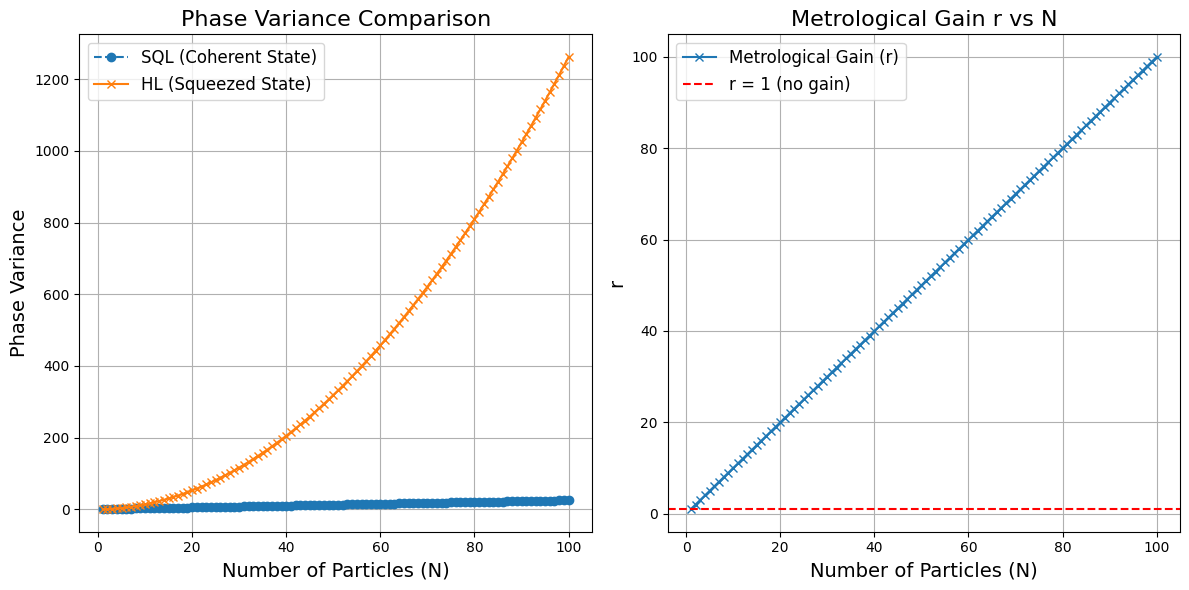

In [68]:
def plot_results(N_max, phase_variance_sql, phase_variance_hl, r_values):
    """
    Plot the phase variances and metrological gain r as a function of N.
    
    The scaling of phase variance and Fisher Information are discussed in Pezzé et al., Section III. [42†source].
    
    Parameters:
        N_max (int): Maximum number of particles.
        phase_variance_sql (np.array): Array of phase variances for SQL (Coherent State).
        phase_variance_hl (np.array): Array of phase variances for HL (Squeezed State).
        r_values (np.array): Array of metrological gain values.
    """
    plt.figure(figsize=(12, 6))

    # Plot phase variances
    plt.subplot(1, 2, 1)
    plt.plot(range(1, N_max+1), phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
    plt.plot(range(1, N_max+1), phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
    plt.title("Phase Variance Comparison", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("Phase Variance", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot metrological gain r
    plt.subplot(1, 2, 2)
    plt.plot(range(1, N_max+1), r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
    plt.title("Metrological Gain r vs N", fontsize=16)
    plt.xlabel("Number of Particles (N)", fontsize=14)
    plt.ylabel("r", fontsize=14)
    plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
N_max = 100
omega = 1.0
squeezing_strength = 0.5

# Calculate phase variances and r values
phase_variance_sql, phase_variance_hl, r_values = calculate_phase_variances(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total)

# Plot the results
plot_results(N_max, phase_variance_sql, phase_variance_hl, r_values)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

def squeeze_state_jmat(N, initial_state, theta=np.pi/4, axis='y'):
    """
    Squeeze the given initial state using jmat angular momentum operators.

    Parameters:
    - N (int): Number of particles (dimension related to the angular momentum).
    - initial_state (qutip.Qobj): Initial quantum state (ket or density matrix).
    - theta (float): Squeezing angle (default: pi/4).
    - axis (str): Axis for squeezing ('x', 'y', or 'z').

    Returns:
    - squeezed_rho (qutip.Qobj): Squeezed density matrix.
    - rho (qutip.Qobj): Original density matrix (in case initial_state was a ket).
    """
    # Check if initial_state is a ket, if so convert it to density matrix
    if initial_state.isket:
        rho = qt.ket2dm(initial_state)
    else:
        rho = initial_state

    # Choose the appropriate axis for squeezing using angular momentum operators
    if axis == 'x':
        operator = qt.jmat(N/2, 'x')  # Jx
    elif axis == 'y':
        operator = qt.jmat(N/2, 'y')  # Jy
    elif axis == 'z':
        operator = qt.jmat(N/2, 'z')  # Jz
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")

    # Apply squeezing transformation along the chosen axis
    S = (-1j * theta * operator).expm()  # Exponential of the chosen angular momentum operator (squeezing operator)
    squeezed_rho = S * rho * S.dag()  # Apply squeezing transformation

    return squeezed_rho, rho

def measure_and_plot_jmat(N, rho, squeezed_rho, axis='y'):
    """
    Measure and plot variances and expectation values before and after squeezing using jmat.

    Parameters:
    - N (int): Number of particles.
    - rho (qutip.Qobj): Original density matrix (before squeezing).
    - squeezed_rho (qutip.Qobj): Squeezed density matrix (after squeezing).
    - axis (str): Axis for squeezing ('x', 'y', or 'z').
    """
    # Choose the appropriate angular momentum operator for the axis
    if axis == 'x':
        operator = qt.jmat(N/2, 'x')  # Jx
    elif axis == 'y':
        operator = qt.jmat(N/2, 'y')  # Jy
    elif axis == 'z':
        operator = qt.jmat(N/2, 'z')  # Jz
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")

    # Variances and expectation values before squeezing
    var_before = qt.variance(operator, rho)
    expect_before = qt.expect(operator, rho)

    # Variances and expectation values after squeezing
    var_after = qt.variance(operator, squeezed_rho)
    expect_after = qt.expect(operator, squeezed_rho)

    # Plotting Variance Before and After Squeezing
    plt.figure(figsize=(10, 5))
    plt.bar(['Variance Before'], [var_before], label="Before Squeezing")
    plt.bar(['Variance After'], [var_after], label="After Squeezing", alpha=0.7)
    plt.title(f'Variance Before and After Squeezing (along {axis}-axis)')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()

    # Plotting Expectation Values Before and After Squeezing
    plt.figure(figsize=(10, 5))
    plt.bar(['Expectation Before'], [expect_before], label="Before Squeezing")
    plt.bar(['Expectation After'], [expect_after], label="After Squeezing", alpha=0.7)
    plt.title(f'Expectation Values Before and After Squeezing (along {axis}-axis)')
    plt.ylabel('Expectation Value')
    plt.legend()
    plt.show()

def calculate_fidelity(squeezed_rho, target_state):
    """
    Calculate the fidelity between the squeezed state and a target state.

    Parameters:
    - squeezed_rho (qutip.Qobj): The squeezed density matrix.
    - target_state (qutip.Qobj): The target quantum state (ket or density matrix).

    Returns:
    - fidelity (float): Fidelity between the squeezed state and the target state.
    """
    # Convert target state to density matrix if it is a ket
    if target_state.isket:
        target_rho = qt.ket2dm(target_state)
    else:
        target_rho = target_state

    # Calculate and return fidelity
    fidelity = qt.fidelity(squeezed_rho, target_rho)
    print(f"Fidelity between squeezed state and target state: {fidelity}")
    return fidelity


In [97]:
import numpy as np
import qutip as qt

def create_ghz_state(N):
    """
    Create a GHZ state for N qubits: |GHZ> = (|00..0> + |11..1>) / sqrt(2)
    """
    ghz_state = (qt.tensor([qt.basis(2, 0) for _ in range(N)]) + qt.tensor([qt.basis(2, 1) for _ in range(N)])).unit()
    return ghz_state

# Define the number of qubits for the GHZ state and the spin system
N = 5

# Define an initial spin coherent state
initial_state = qt.coherent(N+1, 0)  # Spin coherent state in the j=N/2 subspace

# Create the GHZ state |GHZ> = (|00...0> + |11...1>) / sqrt(2)
ghz_state = create_ghz_state(N)

# Create a list of 50 angles between 0 and 2π for testing and a range of squeezing strengths
angles = np.linspace(0, 2 * np.pi, 50)
squeezing_strengths = np.linspace(0.1, 2.0, 50)

# Loop through different squeezing strengths and angles
for r in squeezing_strengths:
    for theta in angles:
        print(f"Testing squeezing strength r = {r}, angle theta = {theta}")

        # Squeeze the state with the given strength and angle
        squeezed_rho, original_rho = squeeze_state_jmat(N, initial_state, r=r, theta=theta, axis='y')

        # Calculate fidelity with the GHZ state (even though they're in different spaces, we calculate it for testing purposes)
        fidelity = calculate_fidelity(squeezed_rho, ghz_state)
        print(f"Fidelity with GHZ state: {fidelity}\n")

        # If the fidelity is above a certain threshold (say 0.9), stop and plot the results
        if fidelity > 0.9:
            print(f"Found high fidelity with r = {r}, theta = {theta}: {fidelity}")
            # Measure and plot the results only after finding a good fidelity
            measure_and_plot_jmat(N, original_rho, squeezed_rho, axis='y')
            break
    if fidelity > 0.9:
        break
else:
    print("No high fidelity found, showing the last result.")
    # If no high fidelity is found, plot the last result
    measure_and_plot_jmat(N, original_rho, squeezed_rho, axis='y')


Testing squeezing strength r = 0.1, angle theta = 0.0


TypeError: Density matrices do not have same dimensions.

Testing squeezing strength r = 0.1, angle theta = 0.0
Fidelity between squeezed state and target state: 0.12920101781587762
Fidelity with target state: 0.12920101781587762

Testing squeezing strength r = 0.1, angle theta = 0.1282282715750936
Fidelity between squeezed state and target state: 0.12433764468790555
Fidelity with target state: 0.12433764468790555

Testing squeezing strength r = 0.1, angle theta = 0.2564565431501872
Fidelity between squeezed state and target state: 0.11955453028957884
Fidelity with target state: 0.11955453028957884

Testing squeezing strength r = 0.1, angle theta = 0.38468481472528077
Fidelity between squeezed state and target state: 0.11485132318157022
Fidelity with target state: 0.11485132318157022

Testing squeezing strength r = 0.1, angle theta = 0.5129130863003744
Fidelity between squeezed state and target state: 0.11022761441071646
Fidelity with target state: 0.11022761441071646

Testing squeezing strength r = 0.1, angle theta = 0.6411413578754679
Fidel

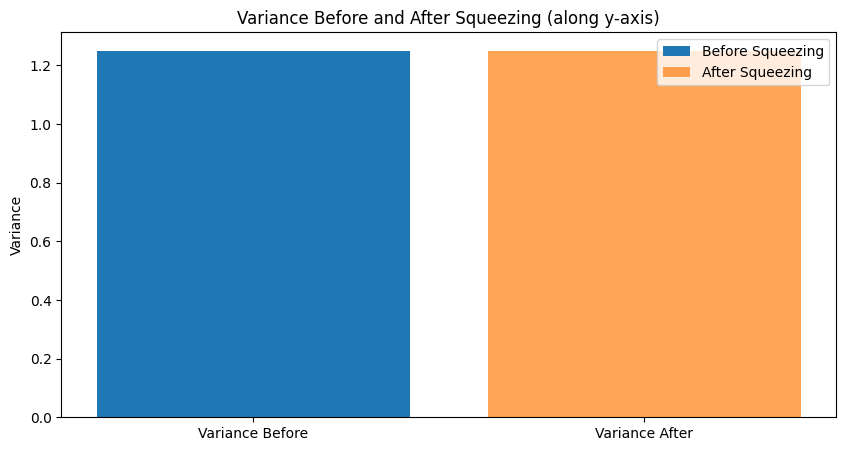

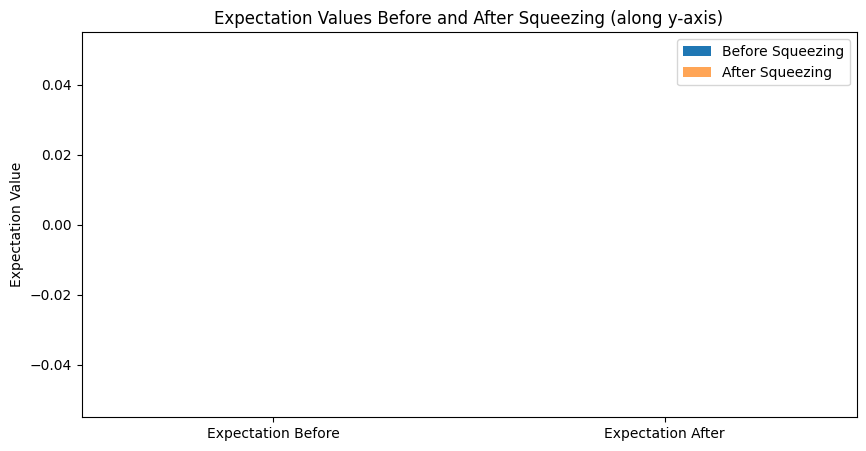

In [94]:
import numpy as np
import qutip as qt
# from your_module import squeeze_state_jmat, measure_and_plot_jmat, calculate_fidelity

def squeeze_state_jmat(N, initial_state, r=0.5, theta=np.pi/4, axis='y'):
    """
    Squeeze the given initial state using jmat angular momentum operators, with a squeezing strength r.
    
    Parameters:
    - N (int): Number of particles (dimension related to the angular momentum).
    - initial_state (qutip.Qobj): Initial quantum state (ket or density matrix).
    - r (float): Squeezing strength.
    - theta (float): Squeezing angle (default: pi/4).
    - axis (str): Axis for squeezing ('x', 'y', or 'z').

    Returns:
    - squeezed_rho (qutip.Qobj): Squeezed density matrix.
    - rho (qutip.Qobj): Original density matrix (in case initial_state was a ket).
    """
    # Check if initial_state is a ket, if so convert it to density matrix
    if initial_state.isket:
        rho = qt.ket2dm(initial_state)
    else:
        rho = initial_state

    # Choose the appropriate axis for squeezing using angular momentum operators
    if axis == 'x':
        operator = qt.jmat(N/2, 'x')  # Jx
    elif axis == 'y':
        operator = qt.jmat(N/2, 'y')  # Jy
    elif axis == 'z':
        operator = qt.jmat(N/2, 'z')  # Jz
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")

    # Apply squeezing transformation along the chosen axis with squeezing strength r
    S = (-1j * r * theta * operator).expm()  # Squeezing operator with strength r
    squeezed_rho = S * rho * S.dag()  # Apply squeezing transformation

    return squeezed_rho, rho

# Test with Squeezing Parameter
N = 5
initial_state = qt.coherent(N+1, 0)  # Spin coherent state

# Loop through different squeezing strengths and angles
angles = np.linspace(0, 2 * np.pi, 50)
squeezing_strengths = np.linspace(0.1, 2.0, 50)

for r in squeezing_strengths:
    for theta in angles:
        print(f"Testing squeezing strength r = {r}, angle theta = {theta}")

        # Squeeze the state with the given strength and angle
        squeezed_rho, original_rho = squeeze_state_jmat(N, initial_state, r=r, theta=theta, axis='y')

        # Define a target state in the same Hilbert space (for example, another spin coherent state)
        target_state = qt.coherent(N+1, np.pi)  # Another spin coherent state for comparison

        # Calculate fidelity with the target state in the same Hilbert space
        fidelity = calculate_fidelity(squeezed_rho, target_state)
        print(f"Fidelity with target state: {fidelity}\n")

        # If the fidelity is above a certain threshold (say 0.9), stop and plot the results
        if fidelity > 0.9:
            print(f"Found high fidelity with r = {r}, theta = {theta}: {fidelity}")
            # Measure and plot the results only after finding a good fidelity
            measure_and_plot_jmat(N, original_rho, squeezed_rho, axis='y')
            break
    if fidelity > 0.9:
        break


In [57]:
# def find_Nopt_and_showcase(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total):
#     """
#     Find the optimal N (N_opt) where entanglement is no longer useful.
#     Plot results showing how entanglement loses its advantage beyond N_opt.
    
#     Parameters:
#         N_max (int): Maximum number of particles to consider.
#         omega (float): Frequency shift due to local oscillator.
#         squeezing_strength (float): The squeezing strength for HL strategy.
#         tau_prep_fraction (float): Fraction of total time spent in preparation.
#         tau_meas_fraction (float): Fraction of total time spent in measurement.
#         T_total (float): Total available time for the experiment (fixed).
#     """
    
#     # Calculate phase variances and r values for the given range of N
#     phase_variance_sql, phase_variance_hl, r_values = calculate_phase_variances(
#         N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total
#     )
    
#     # Find N_opt where entanglement stops being useful (r drops below 1)
#     N_opt = None
#     for N in range(1, N_max + 1):
#         if r_values[N - 1] < 1:
#             N_opt = N
#             break
    
#     # Plot the results
#     plt.figure(figsize=(12, 6))

#     # Plot phase variances
#     plt.subplot(1, 2, 1)
#     plt.plot(range(1, N_max+1), phase_variance_sql, label="SQL (Coherent State)", linestyle='--', marker='o')
#     plt.plot(range(1, N_max+1), phase_variance_hl, label="HL (Squeezed State)", linestyle='-', marker='x')
#     plt.title("Phase Variance Comparison", fontsize=16)
#     plt.xlabel("Number of Particles (N)", fontsize=14)
#     plt.ylabel("Phase Variance", fontsize=14)
#     plt.axvline(x=N_opt, color='r', linestyle='--', label=f"N_opt = {N_opt}")
#     plt.legend(fontsize=12)
#     plt.grid(True)

#     # # Plot metrological gain r
#     # plt.subplot(1, 2, 2)
#     # plt.plot(range(1, N_max+1), r_values, label="Metrological Gain (r)", linestyle='-', marker='x')
#     # plt.title("Metrological Gain r vs N", fontsize=16)
#     # plt.xlabel("Number of Particles (N)", fontsize=14)
#     # plt.ylabel("r", fontsize=14)
#     # plt.axhline(y=1, color='r', linestyle='--', label="r = 1 (no gain)")
#     # plt.axvline(x=N_opt, color='r', linestyle='--', label=f"N_opt = {N_opt}")
#     # plt.legend(fontsize=12)
#     # plt.grid(True)

#     plt.tight_layout()
#     plt.show()

#     if N_opt:
#         print(f"The optimal number of particles (N_opt) where entanglement stops being useful is: {N_opt}")
#     else:
#         print("Entanglement is beneficial for all N up to N_max.")

# # Parameters
# N_max = 40
# omega = 1.0
# squeezing_strength = 0.5
# T_total = 1.0  # Total available time for experiment
# tau_prep_fraction = 0.5   # Fraction of time for preparation
# tau_meas_fraction = 0.05  # Fraction of time for readout

# # Find N_opt and showcase the results
# find_Nopt_and_showcase(N_max, omega, squeezing_strength, tau_prep_fraction, tau_meas_fraction, T_total)


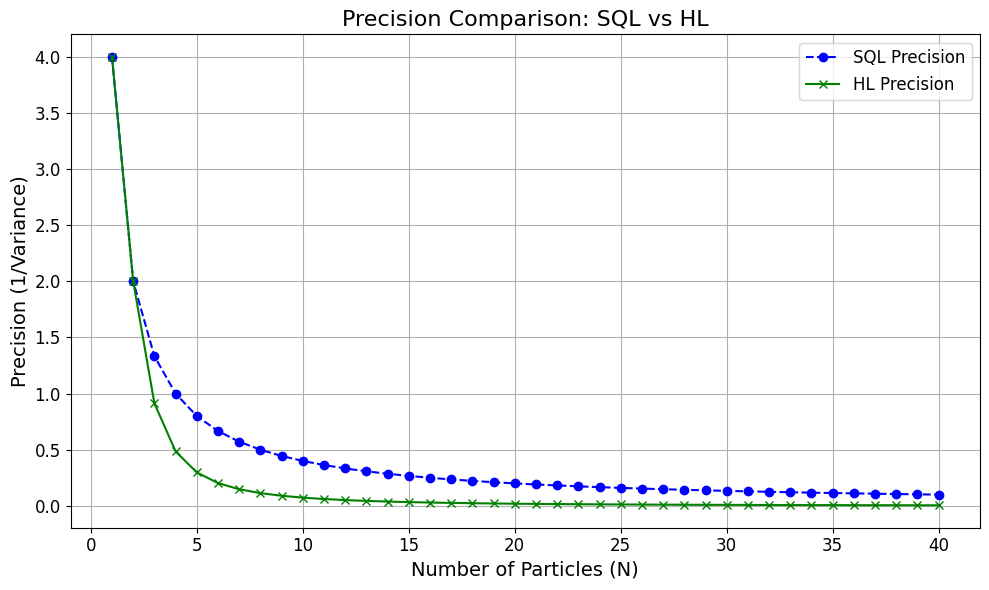

In [58]:
# Calculate precision as 1/variance
precision_sql = 1 / phase_variance_sql
precision_hl = 1 / phase_variance_hl

# Plot precision vs. N
plt.figure(figsize=(10, 6))
plt.plot(N_values, precision_sql, label="SQL Precision", linestyle='--', marker='o', color='blue')
plt.plot(N_values, precision_hl, label="HL Precision", linestyle='-', marker='x', color='green')

plt.title("Precision Comparison: SQL vs HL", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Precision (1/Variance)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


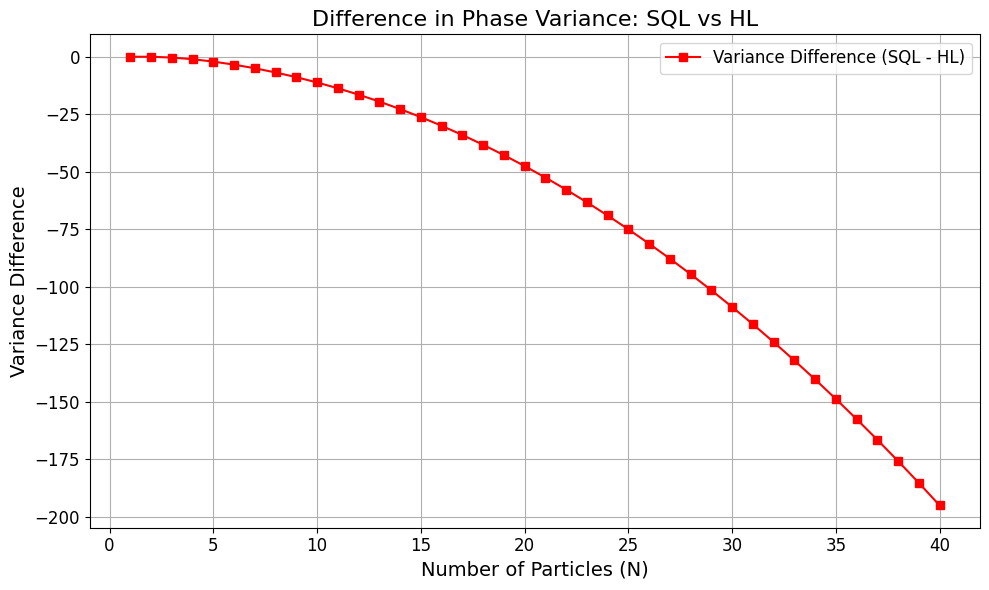

In [59]:
# Difference in variance (SQL - HL)
variance_diff = phase_variance_sql - phase_variance_hl

# Plot difference in variance
plt.figure(figsize=(10, 6))
plt.plot(N_values, variance_diff, label="Variance Difference (SQL - HL)", linestyle='-', marker='s', color='red')

plt.title("Difference in Phase Variance: SQL vs HL", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Variance Difference", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


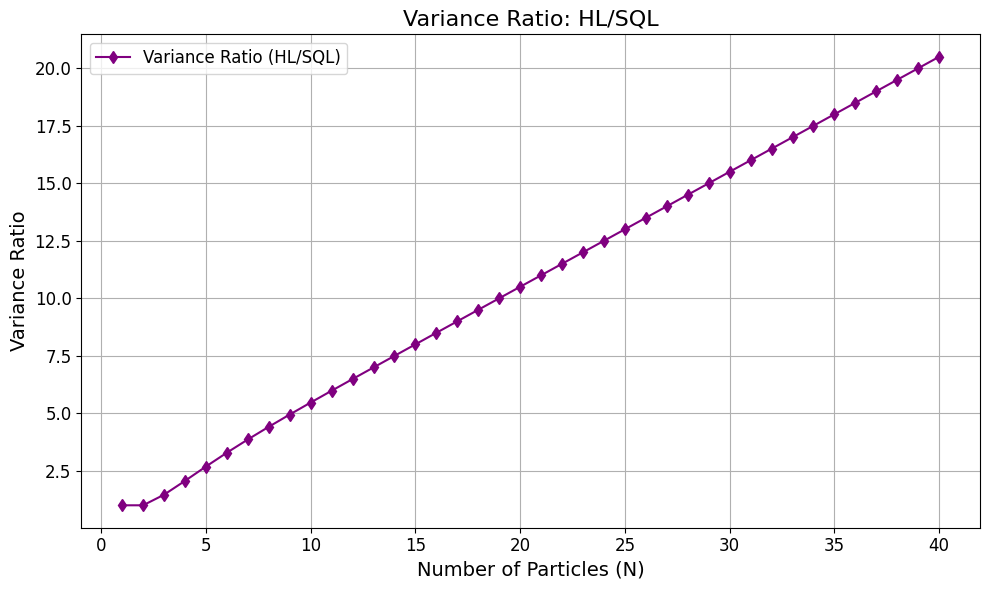

In [60]:
# Ratio of HL variance to SQL variance
variance_ratio = phase_variance_hl / phase_variance_sql

# Plot variance ratio
plt.figure(figsize=(10, 6))
plt.plot(N_values, variance_ratio, label="Variance Ratio (HL/SQL)", linestyle='-', marker='d', color='purple')

plt.title("Variance Ratio: HL/SQL", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Variance Ratio", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
for N, sql_var, hl_var in zip(N_values, phase_variance_sql, phase_variance_hl):
    print(f"N = {N}: SQL Variance = {sql_var}, HL Variance = {hl_var}")

N = 1: SQL Variance = 0.24999999999999997, HL Variance = 0.24999999999999994
N = 2: SQL Variance = 0.5, HL Variance = 0.5
N = 3: SQL Variance = 0.7500000000000002, HL Variance = 1.0947732705988953
N = 4: SQL Variance = 0.9999999999999997, HL Variance = 2.0621101274103566
N = 5: SQL Variance = 1.2499999999999998, HL Variance = 3.355678486872516
N = 6: SQL Variance = 1.5000000000000002, HL Variance = 4.9304207658057075
N = 7: SQL Variance = 1.7500000000000002, HL Variance = 6.758262844000152
N = 8: SQL Variance = 1.9999999999999991, HL Variance = 8.825851809599031
N = 9: SQL Variance = 2.25, HL Variance = 11.129023711496055
N = 10: SQL Variance = 2.500000000000001, HL Variance = 13.668295290457433
N = 11: SQL Variance = 2.7499999999999987, HL Variance = 16.44604470304139
N = 12: SQL Variance = 3.0000000000000018, HL Variance = 19.465017394367358
N = 13: SQL Variance = 3.2500000000000004, HL Variance = 22.727662238877134
N = 14: SQL Variance = 3.499999999999997, HL Variance = 26.235919332

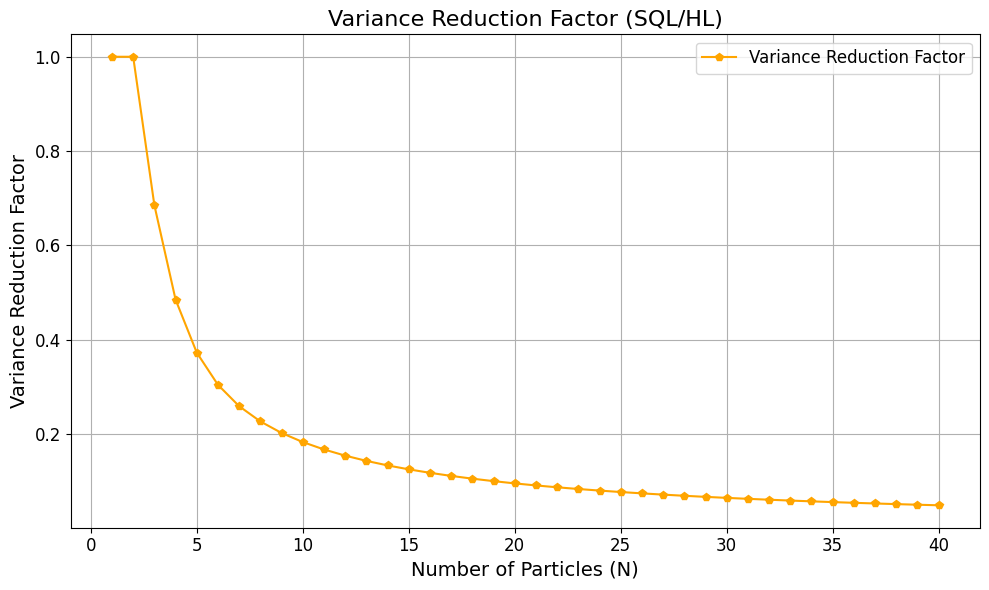

In [62]:
# Variance reduction factor: SQL variance / HL variance
variance_reduction_factor = phase_variance_sql / phase_variance_hl

# Plot variance reduction factor
plt.figure(figsize=(10, 6))
plt.plot(N_values, variance_reduction_factor, label="Variance Reduction Factor", linestyle='-', marker='p', color='orange')

plt.title("Variance Reduction Factor (SQL/HL)", fontsize=16)
plt.xlabel("Number of Particles (N)", fontsize=14)
plt.ylabel("Variance Reduction Factor", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
